# Anomaly detection algorithms

Unsupervised anomaly detection algorithms can detect data that does not belong to normal data patterns. In general, it looks for isolated samples, samples that are in low-density regions. Anomaly detection algorithms can be divided into several approaches such as:

-	Density based 
-	Distance based 
-   Kernel based
-	Statistical approaches
-	Tree-based methods 

In this notebook we test a few of these algorithms. The Local Outlier Factor, robust covariance, One Class Support Vector Machine, Isolation Forest is a tree-based.


**Local Outlier Factor** LOF compares the density of any given data point to the density of its neighbors. Since outliers come from low-density areas, the ratio will be higher for anomalous data points. As a rule of thumb, a normal data point has a LOF between 1 and 1.5 whereas anomalous observations will have much higher LOF. The higher the LOF the more likely it is an outlier (2).
Density-based methods identify anomalies based on the local density of data points. Anomalies are detected as points that have significantly lower density compared to their neighboring points. Another example next to LOF is  DBSCAN.

**Distance-based** methods determine anomalies by measuring the distance or dissimilarity of data points to their neighboring points. Points that are significantly distant or dissimilar from others are considered anomalies. Examples include k-nearest neighbors (k-NN), distance-based outlier detection (e.g., using Mahalanobis distance or Euclidean distance), and angle-based outlier detection. k-NN is the foundation of LOF. in some aspect, one can infers that density base and distance base methods are similar to each other or used as the foundation of each other the reason is that the density is not something more than the number of datapoints in a surface area; consequently, density and distance between datapoints have countradictory relationship in a way that if the distance between points increases the density of the dataset in that local area decreases and vica versa.

The **robust covariance** method is a **gaussian elipse-based method**. If it is outside the gaussian curve, or on the edges it might be an outlier. It is based on the Mahalanobis distance which assesses how many standard deviations σ away xᵢ is from μ. An extreme observation has a large distance from the center of a distribution. An envelope around the data set can be constructed by choosing a critical value of the Mahalanobis distance. Points outside this envelope are considered anomalies/outliers. (1)

**One Class Support Vector Machine** is cluster method based on the Support Vector Machine algorithm. Instead of separating classes into clusters, it separates one class from the origin. The points outside the boundary line are classified as outliers. It uses kernels. The default kernel is ‘rbf’ since most of the time the boundary is not linear. (3)

**Isolation Forest is a tree-based** method. The Isolation Forest algorithm does not explicitly consider density or neighborhood relationships between data points. Instead, it uses the idea that anomalies can be identified more quickly and easily in the tree structure compared to normal data points. Anomalies are expected to have shorter paths in the tree, as they require fewer splits to be isolated. It uses partitioning to make isolated trees, with the goal that each point is isolated. The more partitioning is needed, the more chance a data point is a regular point. An outlier is much easier to isolate than a regular point.  (4)

After a couple days of study, now I can realize that the Anomaly detection techniques are used here to find the outliers, then using them to train a model to predict other relevant outliers that may hapen in the future.

one way that one can use to find the best Anomaly Detection method is by using Cross Validation technique. I will explain this technique fully during studying this study case.

[1] Nascimento et all. "A cluster-based algorithm for anomaly detection in time series using Mahalanobis distance." Proceedings on the International Conference on Artificial Intelligence (ICAI). The Steering Committee of The World Congress in Computer Science, Computer Engineering and Applied Computing (WorldComp), 2015. 

[2] Alghushairy, Omar, et al. "A review of local outlier factor algorithms for outlier detection in big data streams." Big Data and Cognitive Computing 5.1 (2020): 1.

[3] Schölkopf, Bernhard, et al. "Support vector method for novelty detection." Advances in neural information processing systems 12 (1999).

[4] Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. "Isolation-based anomaly detection." ACM Transactions on Knowledge Discovery from Data (TKDD) 6.1 (2012): 1-39.

# Important concepts
### Feature Engineering
In various scenarios, redundant sources of information can hold varying degrees of importance. While they may provide crucial insights in some cases, they can be considered mere noise in others. A substantial amount of redundant data can arise from extensive simulations or independent measurements of the same system. Feature engineering techniques possess a unique capability to address this redundancy, ensuring computational efficiency and improved problem tractability.

https://en.wikipedia.org/wiki/Feature_engineering   

# Hypothesis

Anomaly detection techniques are commonly employed in predictive maintenance strategies to identify abnormal patterns or behaviors in machine data that may indicate impending failures.

By monitoring various sensor readings, operational parameters, or other relevant data from machines, anomaly detection algorithms can learn the normal behavior or expected patterns of the machines during their normal operation. When a deviation from the normal behavior is detected, it may indicate a potential failure or malfunction. The hypothesis is that the sensor readings of a pump will generate not normal values in case of an (upcoming) failure, and these can be determined with anomaly detection. Several algorithms will be used to evaluate the hypothesis 

datasource: https://en.wikipedia.org/wiki/Feature_engineering



## Assignment

Choose at least 1 out of the listed assignments

- Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.

- To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook. 

- Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose. 
- Try to find the best configuration for one of the tested algorithms
- Try anomaly detection on a different dataset without timeseries data. Evaluate the outcome


In [1]:
# import the general libraries
import yaml
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# anomaly detection methods modules
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

## The data
I will make some changes here to read the data properly. I will use a configue file for this aim.

In [2]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader():
    """
    explanation: This function open config,yaml file 
    and fetch the gonfigue file information
    input: ...
    output: configue file
    """
    with open("config.yaml", "r") as inputFile:
        config = yaml.safe_load(inputFile)
    return config

In [3]:
def dataframe_maker(config):
    file_directory, file_name = config.values()
    os.chdir(file_directory)
    df = pd.read_csv(file_name).drop('Unnamed: 0', axis=1)
    return df
df = dataframe_maker(configReader())
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

In [4]:
# make a copy of the dataset
df_origin = df.copy()

## Inspect data
This component holds significant importance in every machine learning process as it provides data scientists with valuable insights into a dataset. In this particular case study, in addition to the employed inspection methods, I will incorporate additional techniques to enhance my understanding of the dataset.

In [5]:
def data_inspector(df):

    # find the shape of data
    print(f'dataset has {df.shape[0]} observations, and {df.shape[1]} variables\n')

    # finding the information of this dataset
    print(f'{df.info()}\n')

    # extract the list of null values for columns (mostly sensors)
    null_values = df.isnull().sum(axis=0)
    print(f'number of null values for each columns\n{null_values}\n')
    print(f'maximum number of null values belong to {null_values.idxmax()} with {null_values.max()}\n')
    print(f'minimum number of null values belong to {null_values.idxmin()} with {null_values.min()}\n')
    
    # find the number of null values in the Broken points
    status_df = pd.DataFrame(df.groupby('machine_status'))
    broken_null_values = status_df[1][0].isnull().sum(axis=0)
    print(f'the number of Broken null data is as follows\n{broken_null_values}')

    # investigate null values based on percentages
    percentage_missing = df.isnull().sum().sort_values(ascending=False)/len(df)*100
    print(f'classified the maximum number of null values based on percentage\n')
    print(f'{percentage_missing.head()}\n') # show 5 largest missing 
    
    # find the number of members for each group in machine_status column
    print(f'number of members for each category in machine_status\n')
    print(f'{df.machine_status.value_counts()}\n')

In [6]:
data_inspector(df)

dataset has 220320 observations, and 54 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  senso

For finding the complete set of inspecting information please click on text editor. Machine_status column is a quite important column since one can find about the status of the pomp, the number of breaks and recovery duration by take a look at this column. Based on this information this pomp was broken seven times, 14477 hrs was in the recovery time, and work normally in the rest of this duration.

Regarding the quality of the dataset, there are two columns that show a great number of null values (sensor-15, and sensor-50); consequently, in order to not let these low quality data affects the whole dataset and the subsequent analysis one can erase them from the dataset.

To get more familiar with this dataset, based on this <a href = 'https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering'> link</a>, one can sketch all the sensors' plots as follows. This approach can enhance our comprehension of sensor functionality and even provide insights into the pump's operation.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

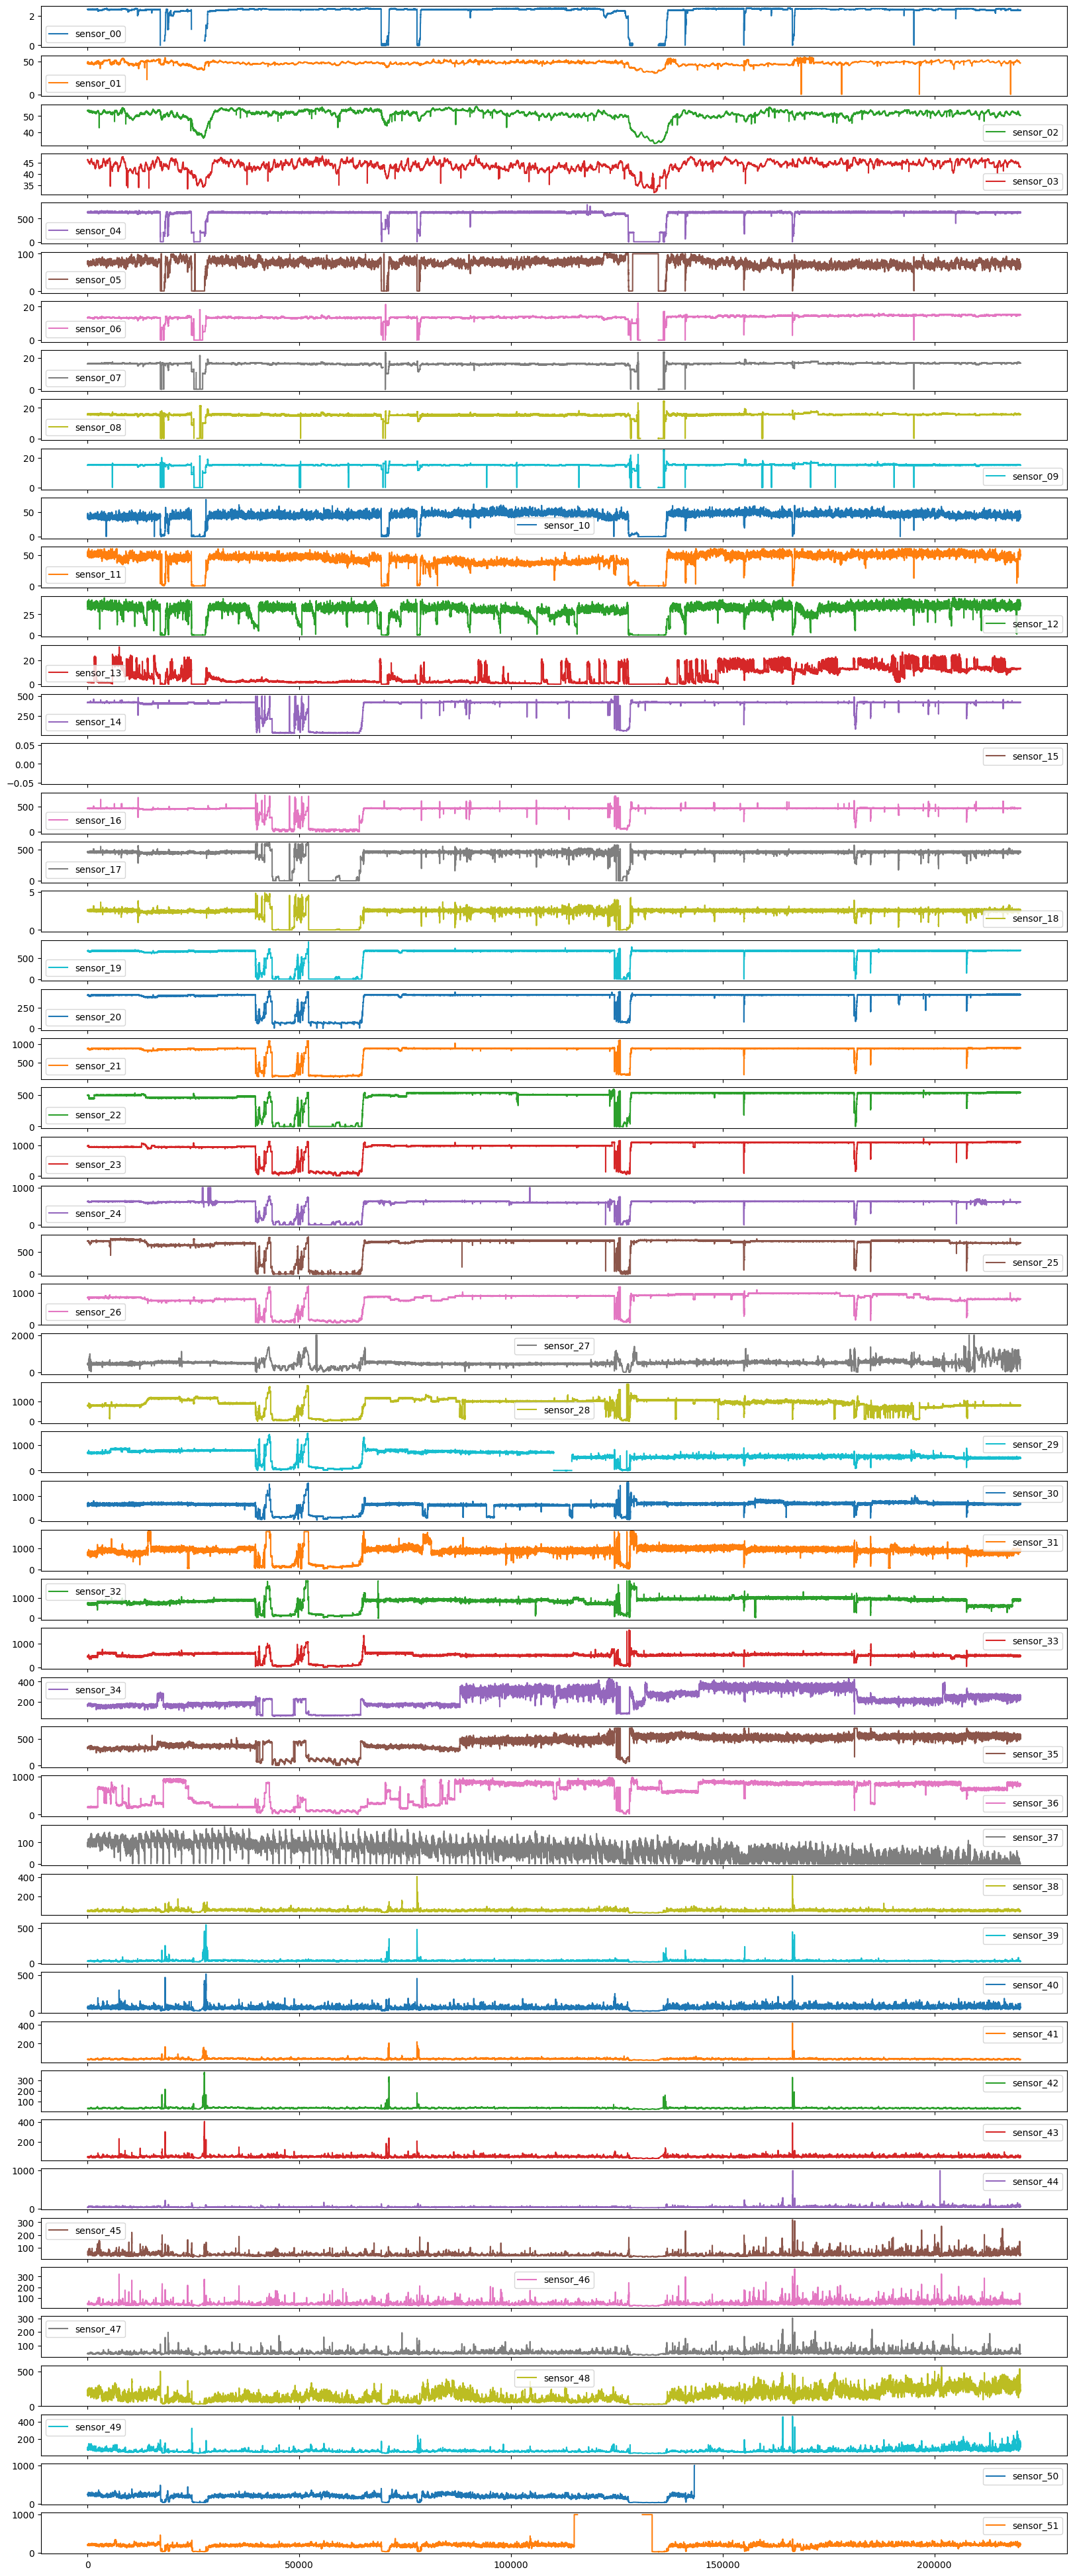

In [7]:
# time series plots for sensor data
df.plot(subplots =True, sharex = True, figsize = (20,50))

The plots offer valuable insights and additional observations. Firstly, as mentioned during the data inspection phase, it is evident that sensor-15 and sensor-50 have a significant number of missing values. In fact, sensor-15 lacks any data points entirely, while sensor-50 has no information available for approximately one-third of the period. Furthermore, certain sensors exhibit a minor amount of missing data, which can be addressed using various machine learning techniques. Additionally, some sensors display notable noise levels. For instance, sensor-37 is entirely noisy, with its data corrupted to the extent that no discernible trend in pump functionality can be detected. Although several other sensors, such as 5, 13, 34, 46, and 48, also exhibit significant noise, they still manage to capture the underlying trend. Finally, based on their behavior, the sensors can be categorized into distinct groups, with sensors within each group behaving similarly but differently from sensors in other groups. Identifying the cause behind these patterns is essential, as it may indicate varying functionalities or potential malfunctions. Analyzing these sensors would require different approaches depending on the specific situation. Now with this insight, one can begun preprocessing part.

# Preprocessing
Based on the above information one can immidiately find that snesor-15 with 100% missing data, and sensor-50 with about 34% should be removed to preserve the quality of the dataset. Also, one can change the type of timestamp column into datetime and set it an the index of the dataset.

In [7]:
# drop low quality columns
df.drop(['sensor_15', 'sensor_50'],inplace = True,axis=1)
# set timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

Furthermore, it is worth evaluating the data quality of sensor-51, considering that it has more than five percent missing values. To accomplish this, one can utilize the machine status technique described in the <a href = 'https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering'> link</a>. Additionally, creating a machine status plot for sensor-00 would be highly informative since it represents the fourth highest proportion of missing values. Comparing this plot with that of sensor-51 can provide valuable insights.

In [8]:
# This visualization inspired from JANANI KARIYAWASAM found at 
# https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering

broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']

def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show()

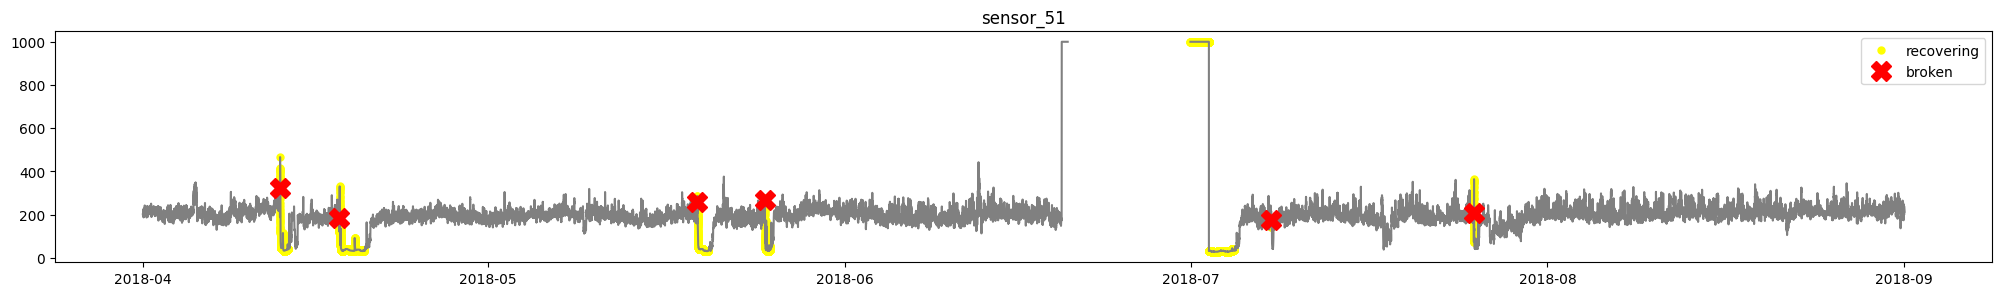

In [9]:
# plot sensor 51
plot_sensor('sensor_51')

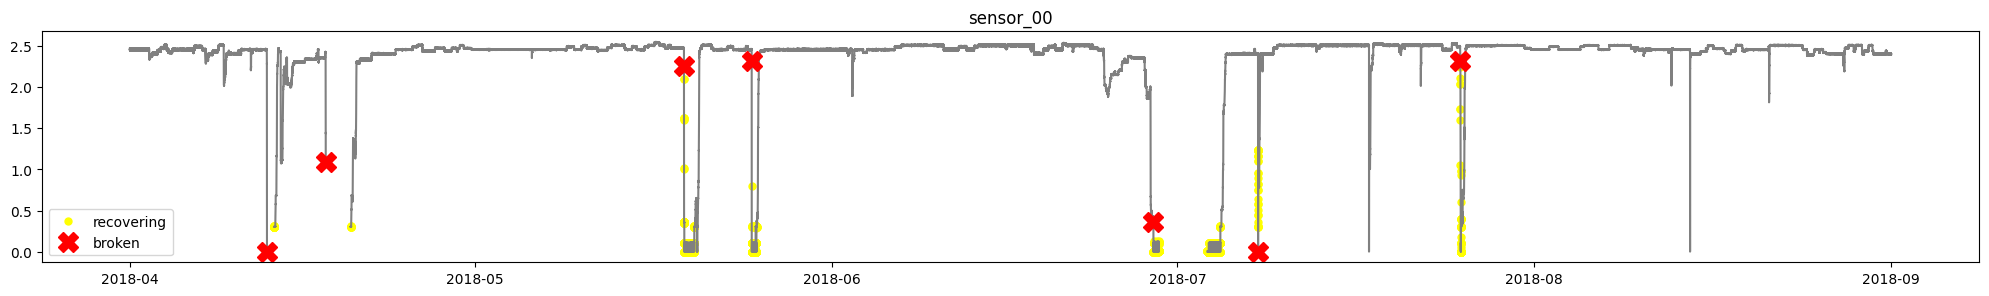

In [10]:
plot_sensor('sensor_00')

The key distinction between these two plots lies not only in the increased noise level of sensor-51 and the varying patterns but also in the absence of a particular broken point in sensor-51. Given that this study focuses on identifying broken points, this missing data can significantly impact the overall model outcome. Consequently, there are two potential approaches to address this issue. Also, one can evaluate the number of missing values in each category with and without sensor-51 since this column contains more than 15 thousand missing data.  To find this, one can use machine status plot for all the sensor or just use an inspecting technique to sum over all the missing data in each section. Here I will use the later approach.

In [11]:
def null_in_status(df):
    status_df = pd.DataFrame(df.groupby('machine_status'))

    for number in range(len(status_df[0])):
        null_number = status_df.iloc[number, 1].isnull().sum().sum()
        print(f'the number of missing values for {status_df.iloc[number, 0]} category is {null_number}')

null_in_status(df)

the number of missing values for BROKEN category is 1
the number of missing values for NORMAL category is 14019
the number of missing values for RECOVERING category is 33217


In [12]:
sensor_51 = df[['sensor_51', 'machine_status']]
null_in_status(sensor_51)

the number of missing values for BROKEN category is 1
the number of missing values for NORMAL category is 12384
the number of missing values for RECOVERING category is 2998


It can be infer that about 88% of missing values in NORMAL category is in the sensor-51 data. So, if one remove this column from the dataset the proportion of the missing values in Recovering category increases from about 70% to about 95%. This will allow us to use imputation methods that most align more with the RECOVERING category, and at the end, it will give us a a higher quality model.

In [13]:
df.drop('sensor_51',inplace = True,axis=1)
null_in_status(df)

the number of missing values for BROKEN category is 0
the number of missing values for NORMAL category is 1635
the number of missing values for RECOVERING category is 30219


In [14]:
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']

 ### Imputation techniques
Base on this <a href = 'https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering'> link</a>, some basic imputation techniques can be 

    zero imputation
    mean imputation
    forward or backward fill imputation

While The technique that has been used in this study to impute the missing values is mean imputaion, it may not the best one in this context. The reason is that after removing sensor_51 data the majority of missing values (about 95%) belong to RECOVERING category, and the difference between these data points and the Normal ones is that they drastically deviate from the mean value of each sensor's dataset. Also, by implementing mean imputation we may unwantedly remove many anomaly points from the dataset; thus, mean imputation cannot be a good representative of the propbable values of the missing values. Moreover, zero imputation can be a good representative for some sensor datasets since their value in RECOVERING category is roughly zero; however, zero cannot be a good repesentative for all the other sensors that have RECOVERING values more than zero since zero may acts as an extrme value (outlier) in these datasets and corrupt the outcomming model. Furthermore, still 5% of the missing data belongs to NORMAL category, so by replacing zero with this values, we may create new anomalies or ourlier in the dataset.Consequently, the best method that one can use in this specific case can be forward or backward fill, and I will choose backward fill in this study.

Also on can click on the following links to get familiar with more imputation methods:

https://www.kaggle.com/code/juejuewang/handle-missing-values-in-time-series-for-beginners/report

https://datascience.stackexchange.com/questions/57776/explain-forward-filling-and-backward-filling-data-filling

https://www.kaggle.com/code/dansbecker/handling-missing-values/notebook

In [15]:
def df_croper(df,column_name):
    
    dfs_dict = {}
    unique_names = list(df[column_name].unique())
    for name in unique_names:
        crop_df = df[df[column_name]==name]
        dfs_dict[name] = crop_df

    return dfs_dict

In [193]:
def df_imputer(df, method='bfill'):
    m, n = df.shape
    X = df.fillna(method=method)

    return X

To evaluate the result of the imputing technique and also to have an exact sense of the location of the BROKEN and RECOVERING datapoints one can use machine status plot of the sensors.

In [29]:
def plot_sensor_anomolies(df, sensor_names, column_name='machine_status', anomaly_method_name=None):
    
    broken_rows = df[df['machine_status']=='BROKEN']
    recovery_rows = df[df['machine_status']=='RECOVERING']
    

    for sensor in sensor_names:
    
        plt.figure(figsize=(25,3))
        plt.plot(df[sensor], color='grey')
        plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
        plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')

        if anomaly_method_name != None:
            anomoly_rows = df[df[f'{anomaly_method_name}'] == -1]
            plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=7, label='anomoly predicted', alpha = 0.2)

        plt.title(sensor)
        plt.legend()
        plt.show();

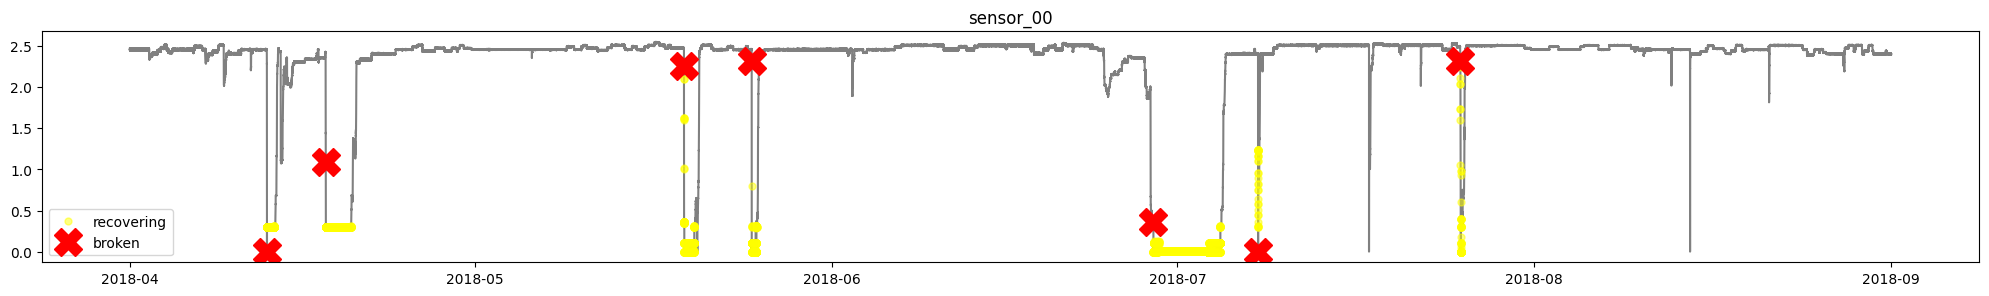

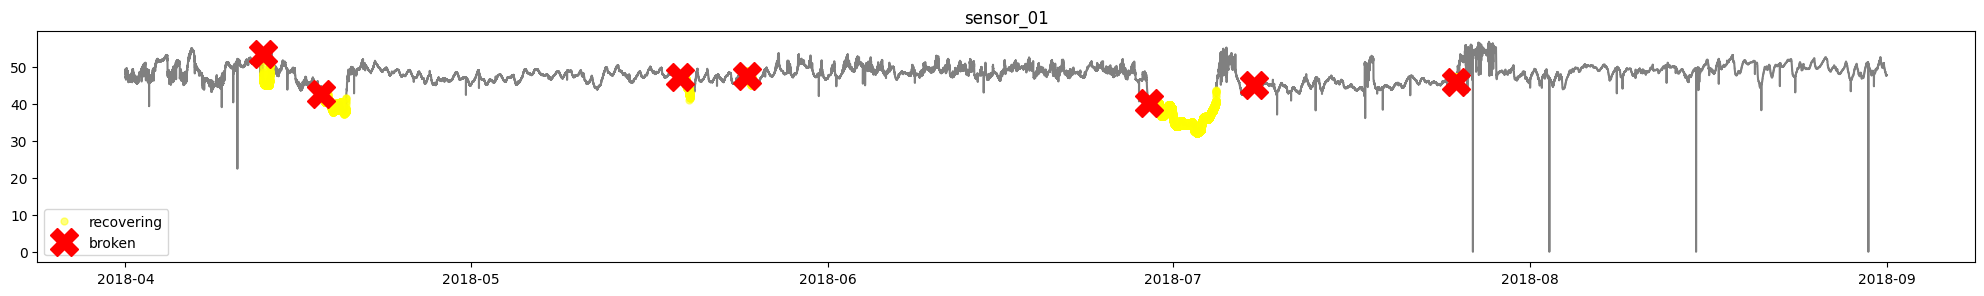

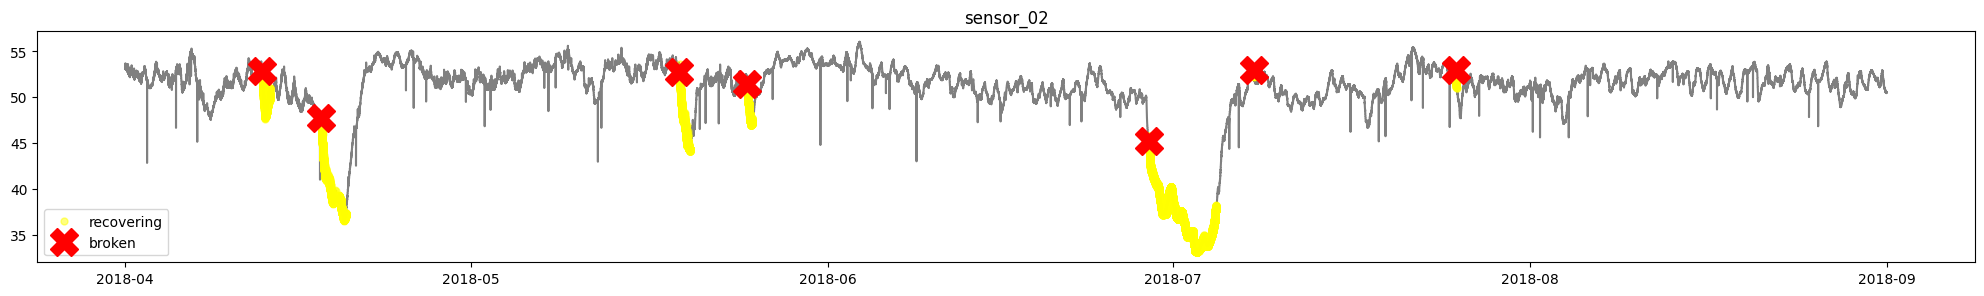

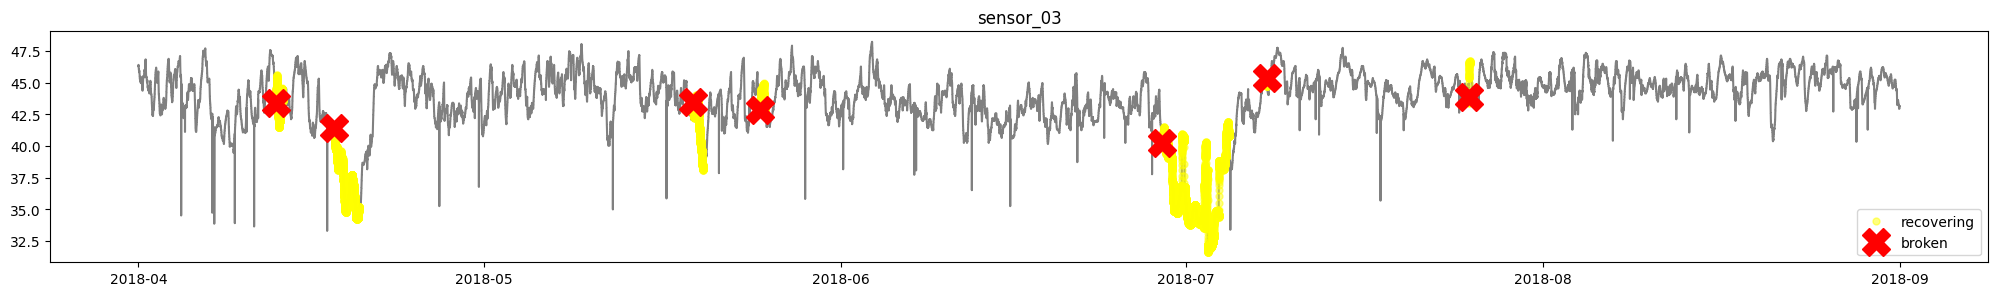

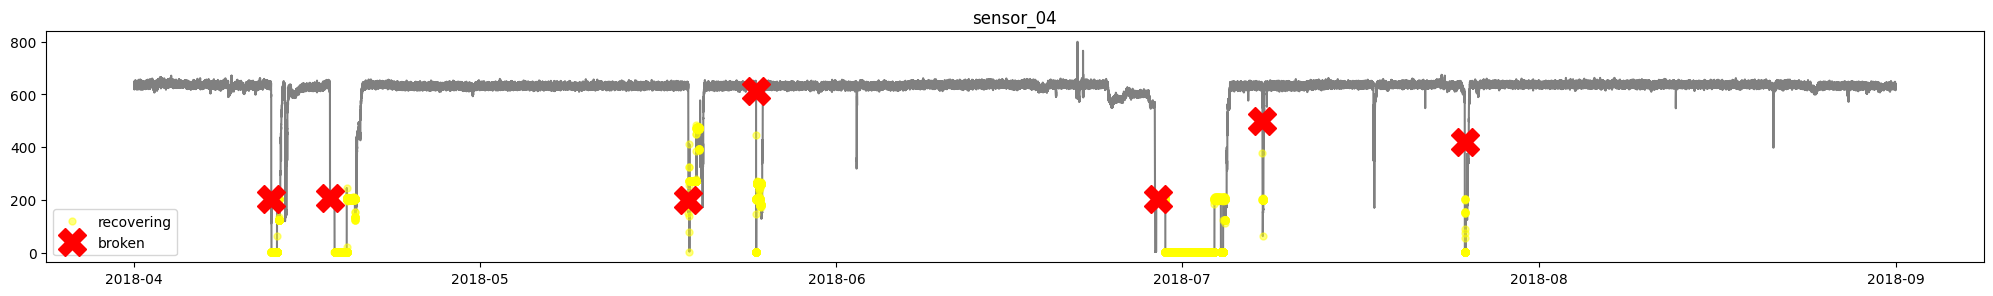

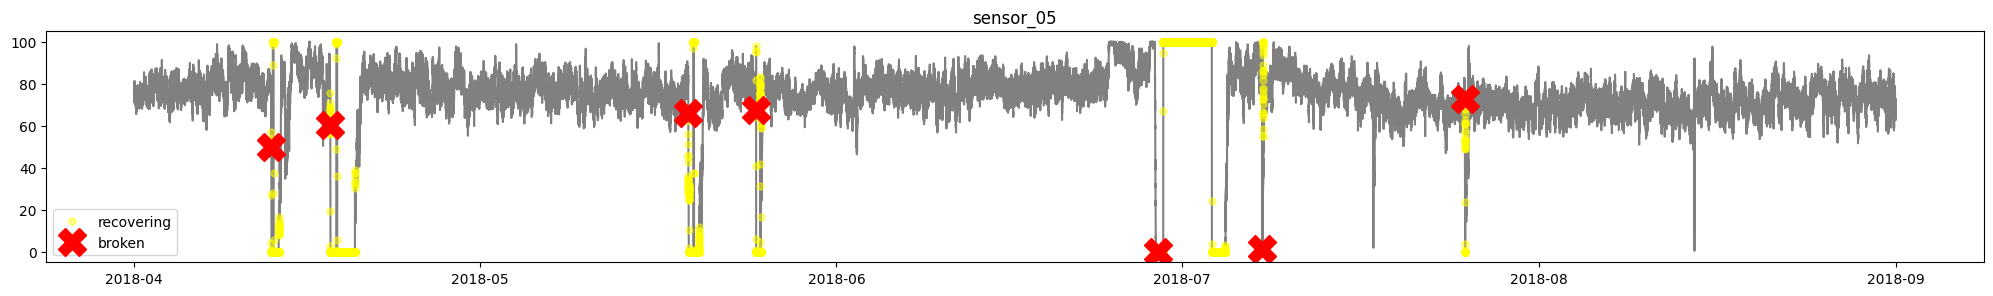

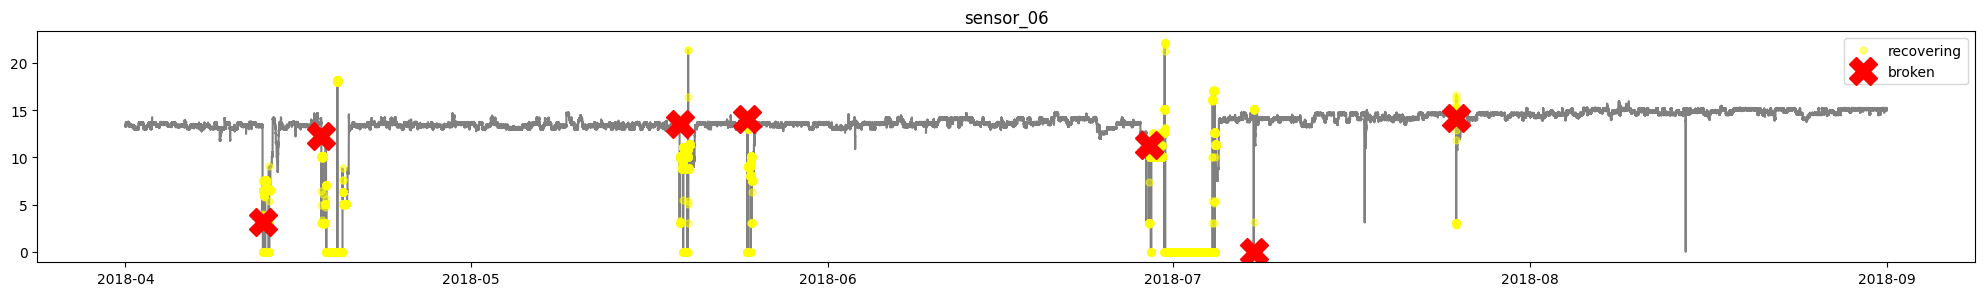

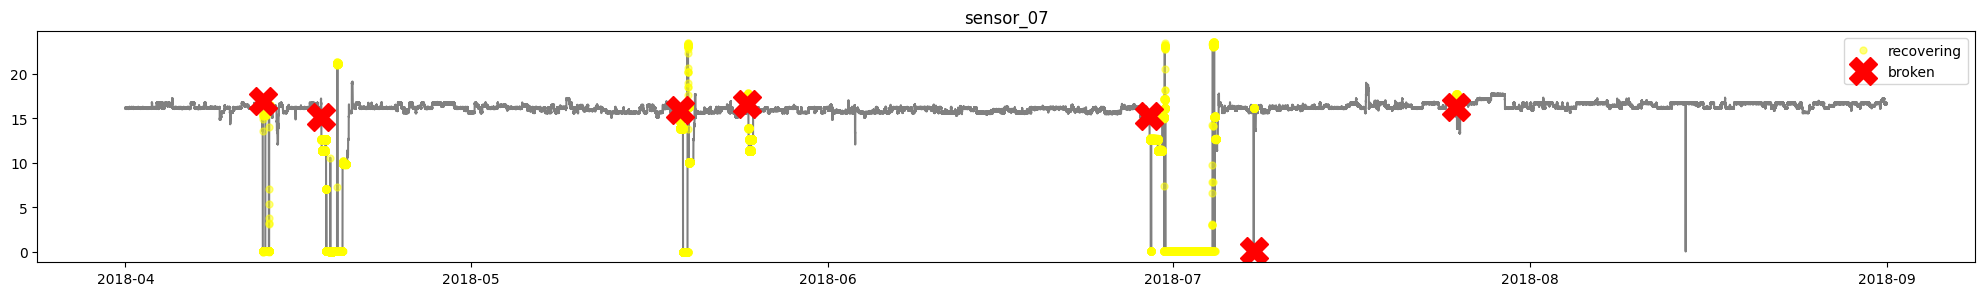

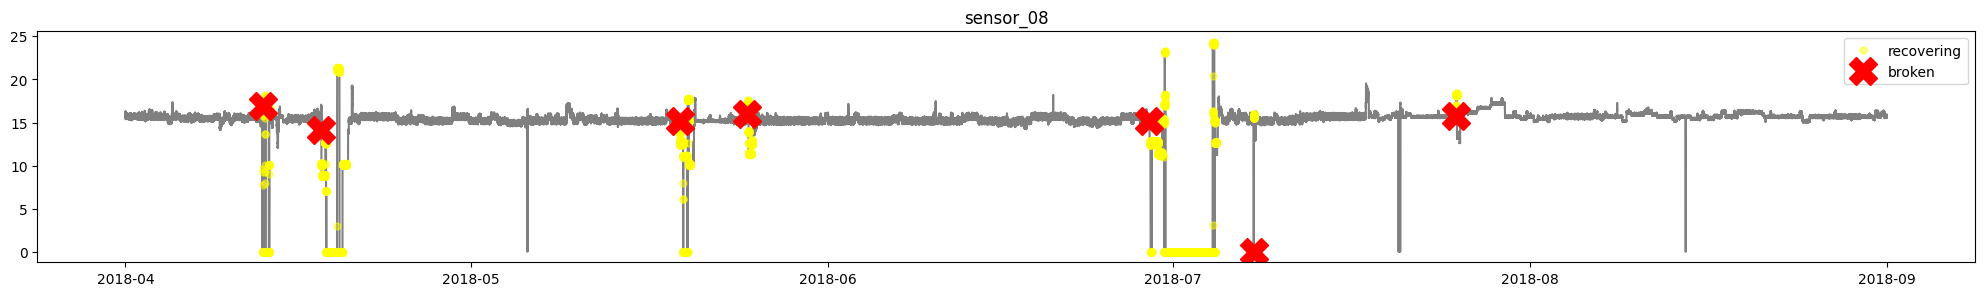

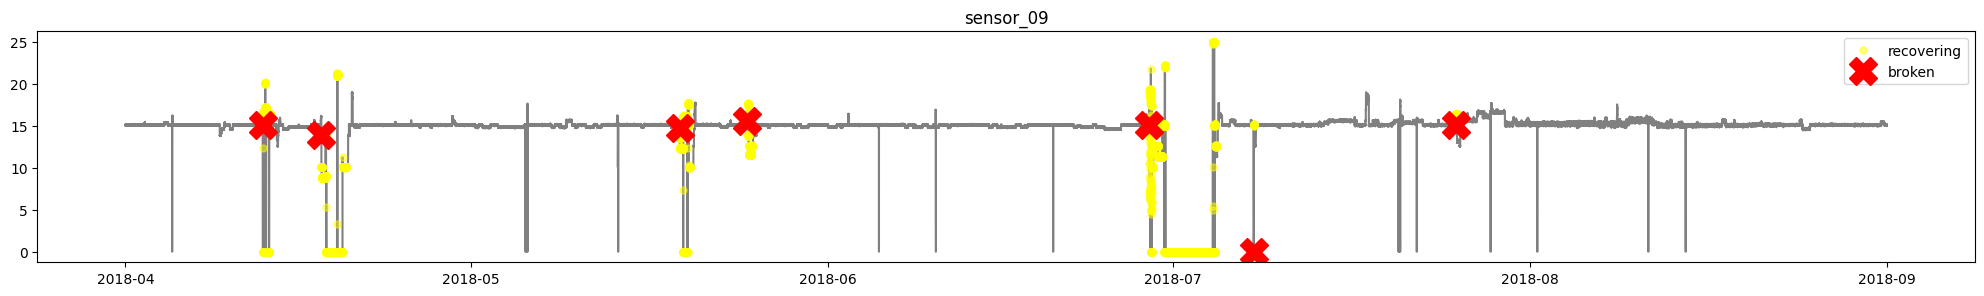

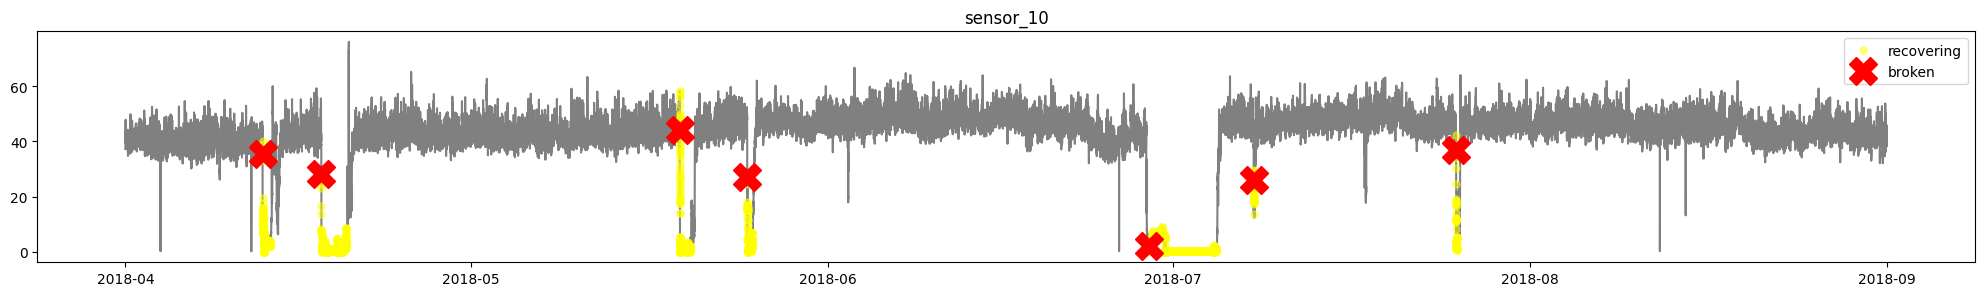

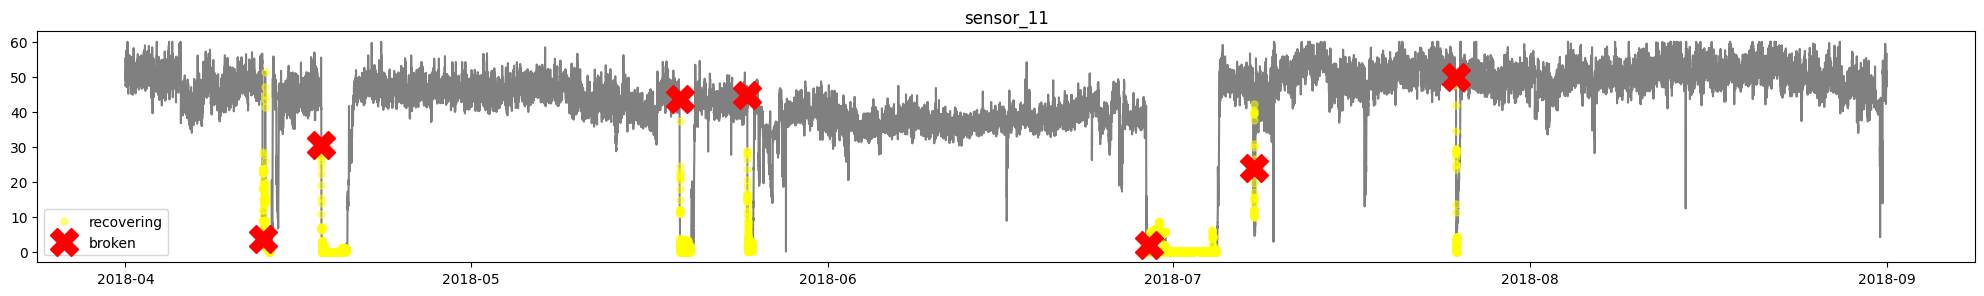

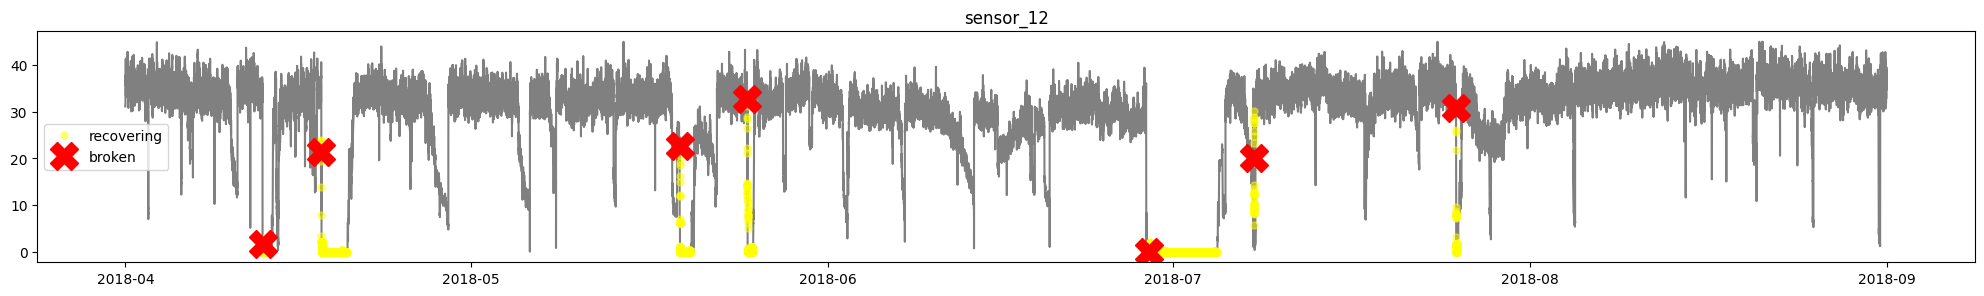

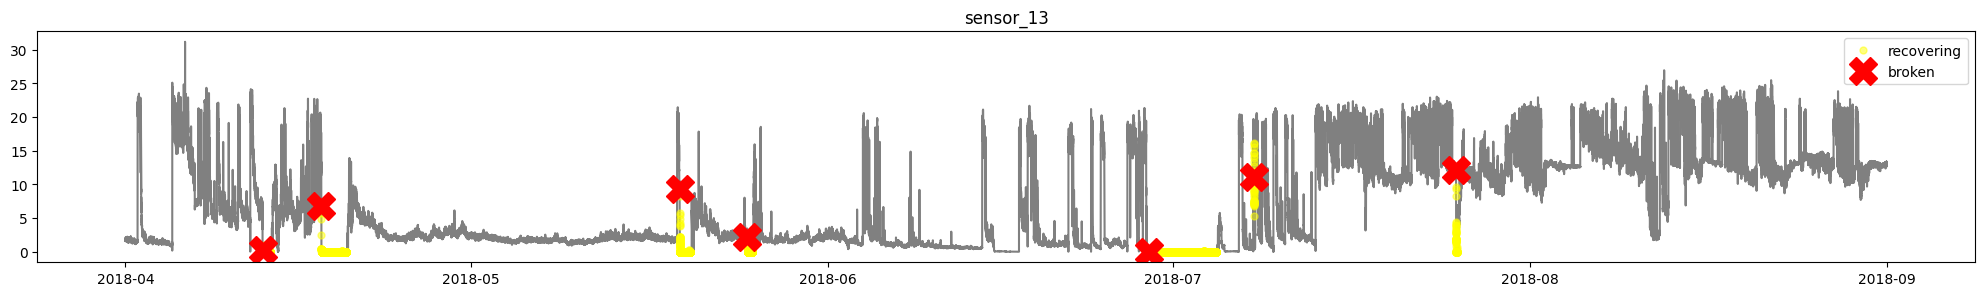

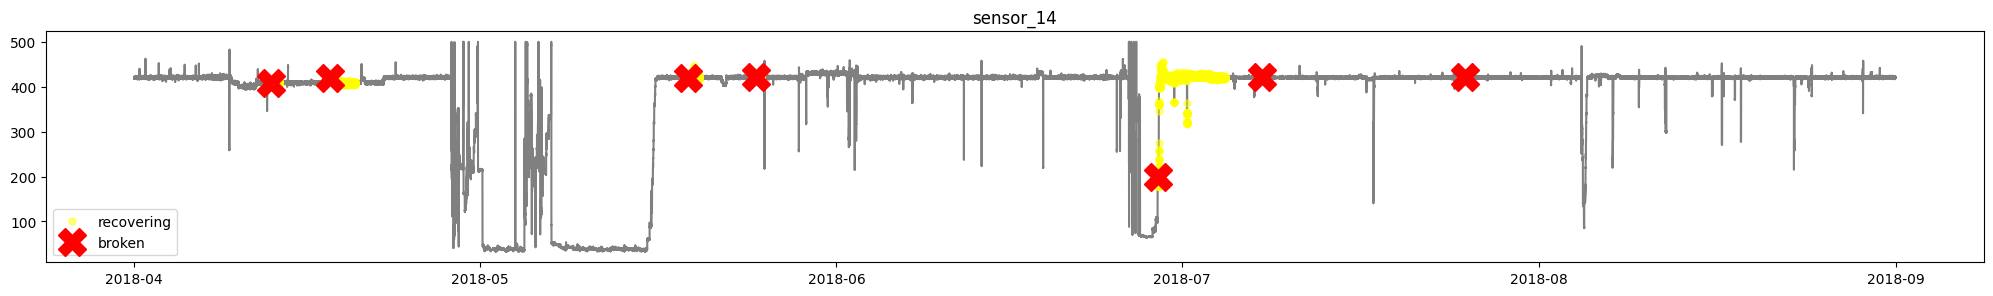

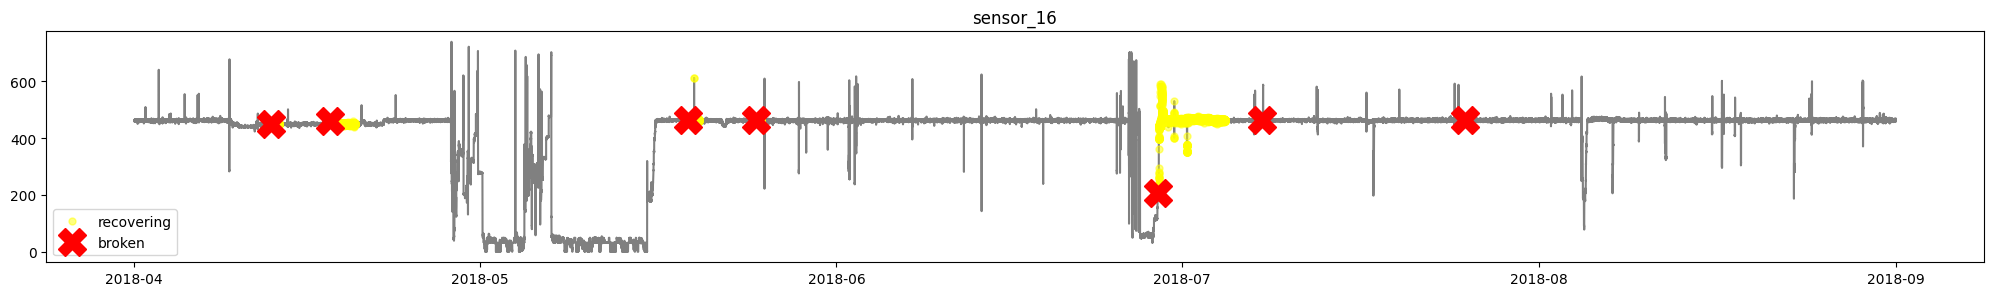

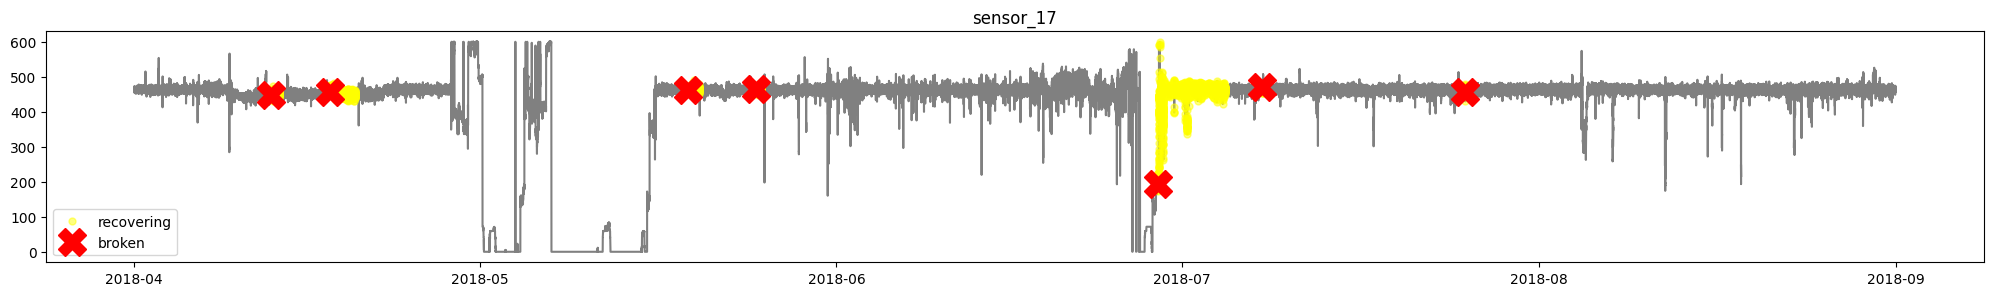

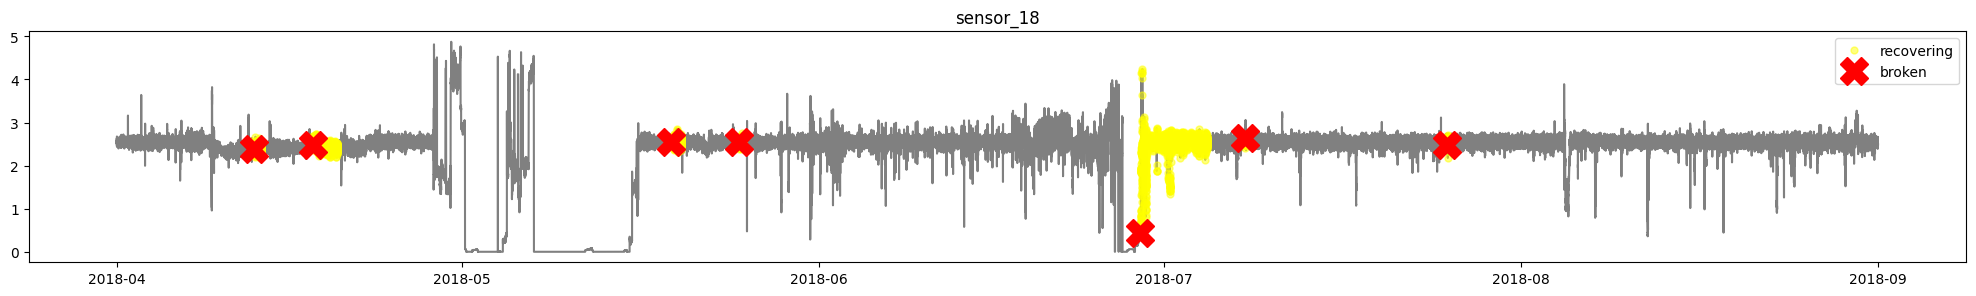

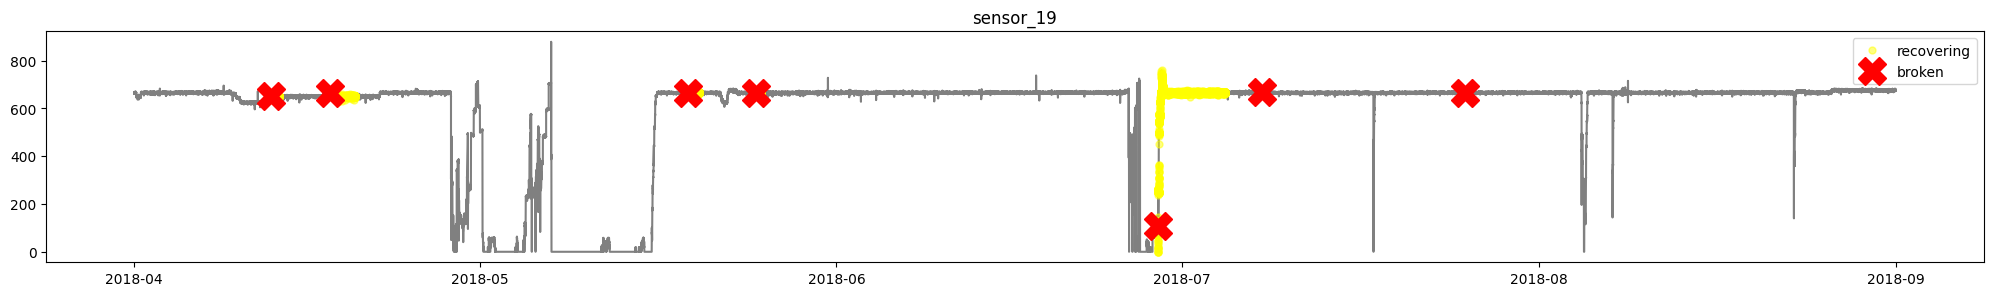

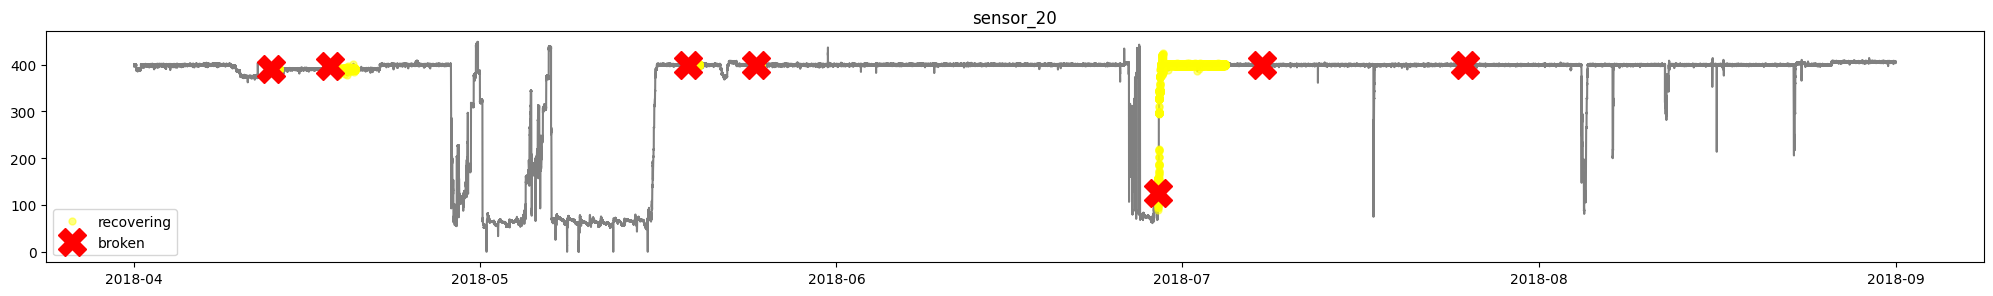

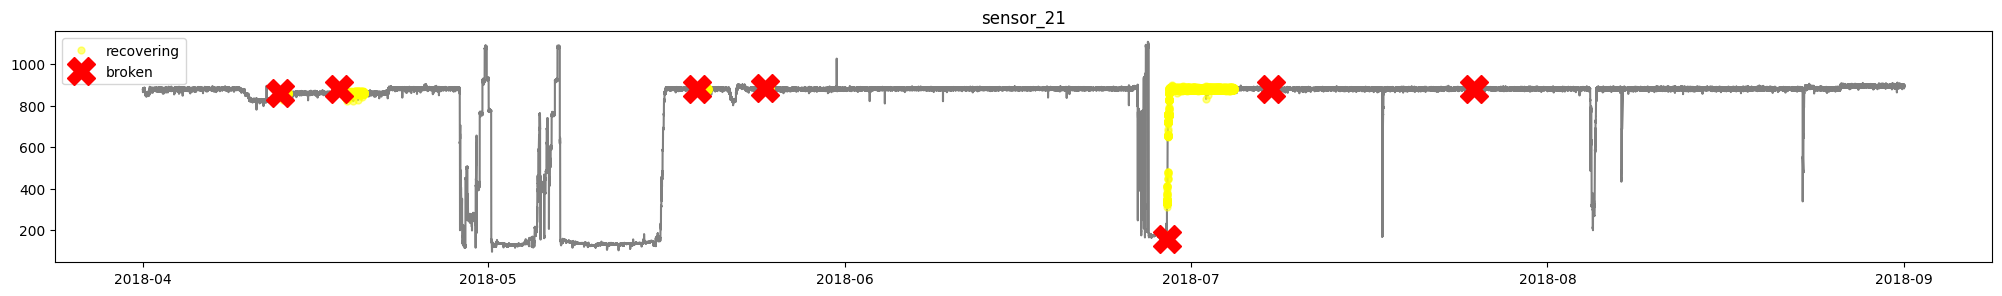

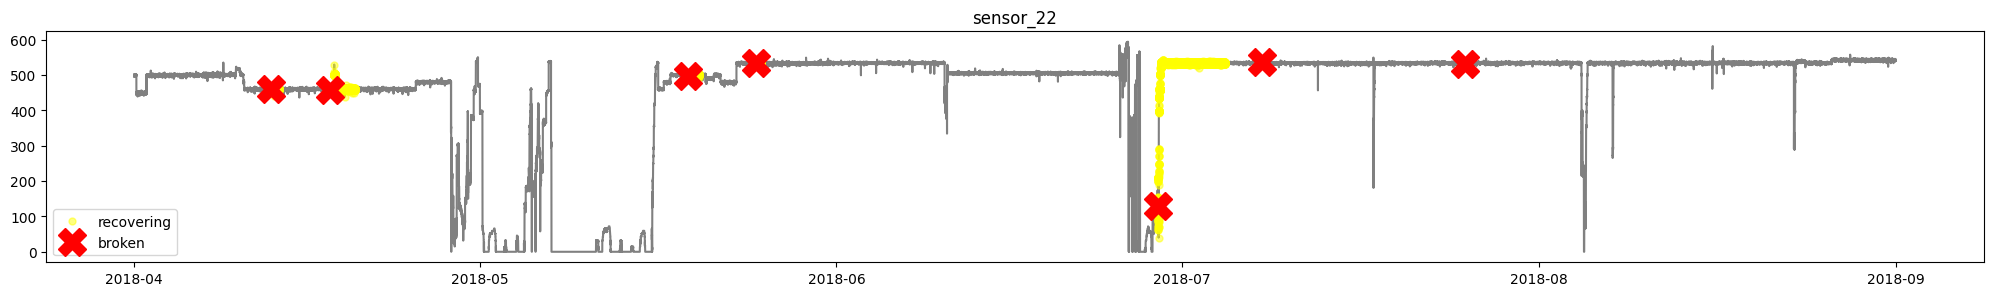

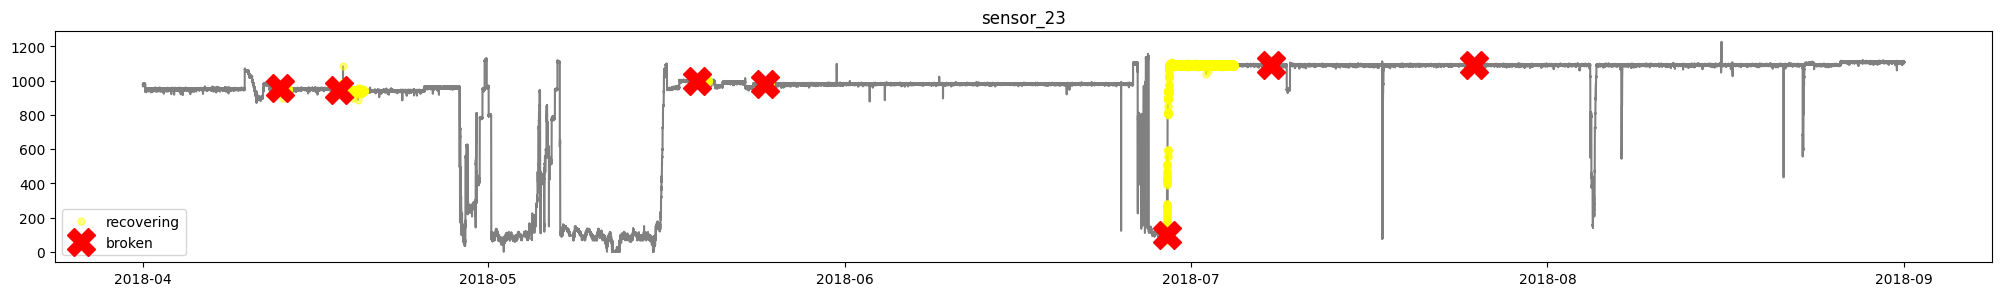

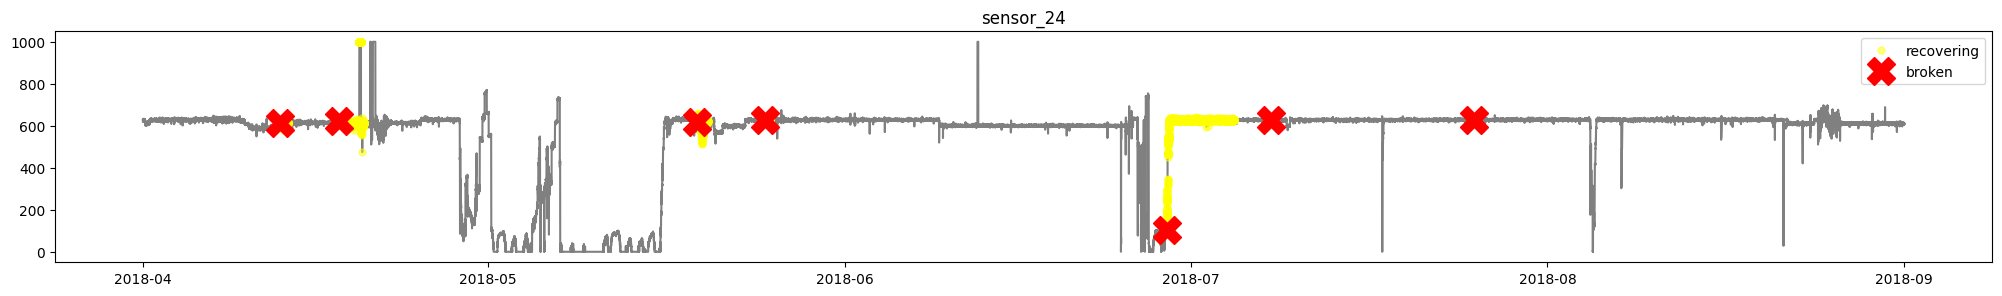

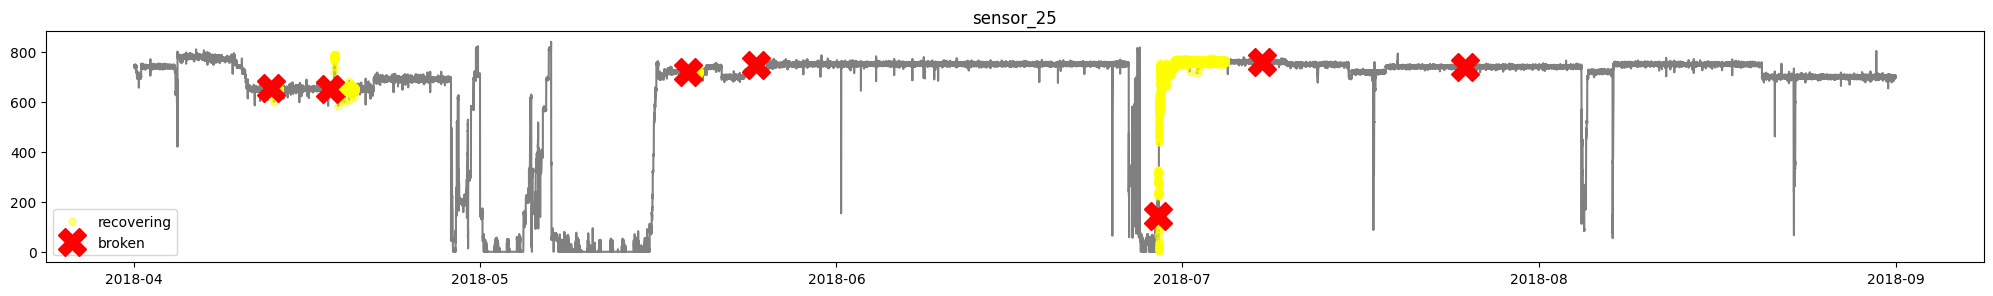

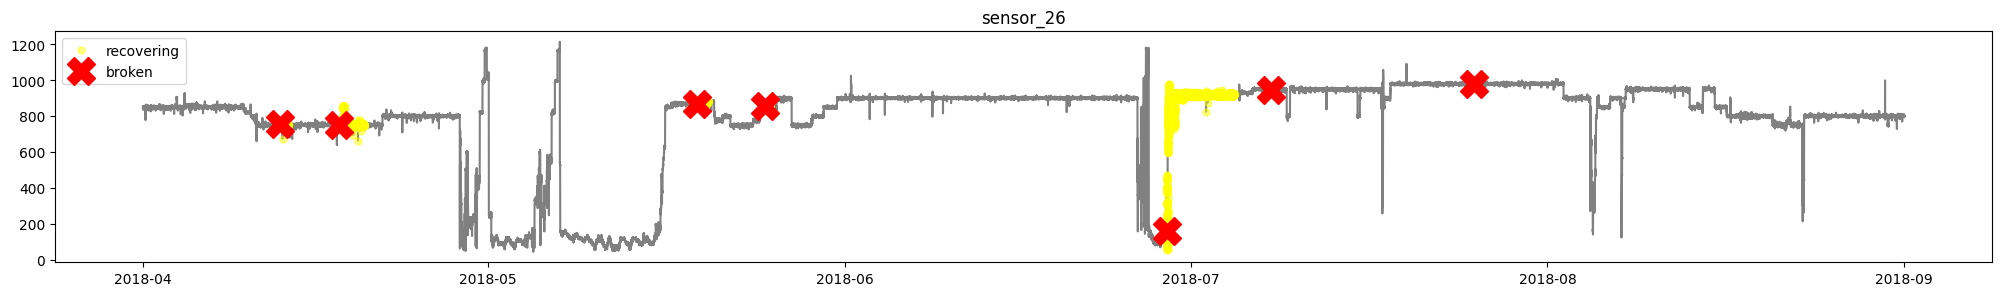

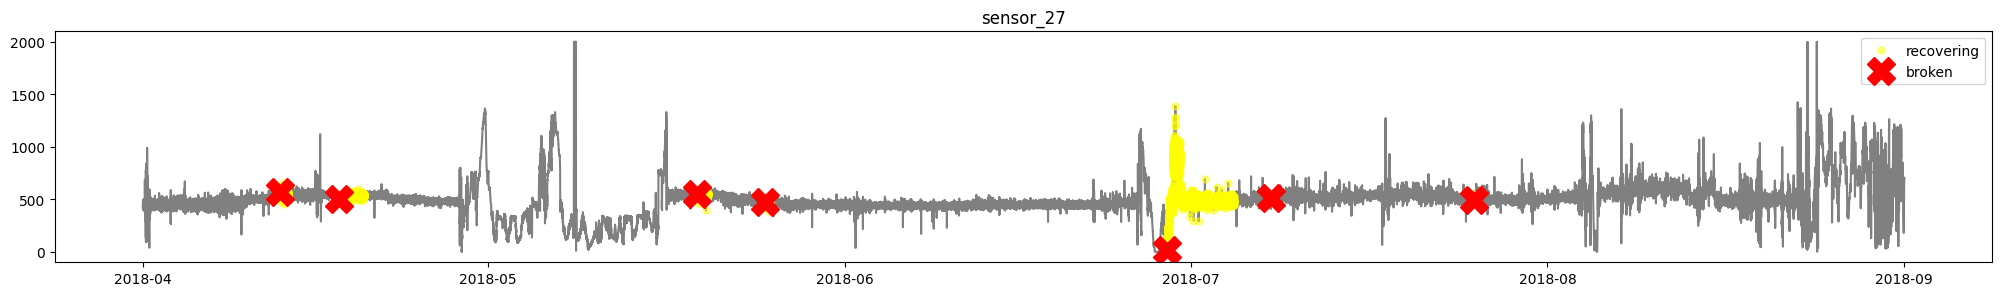

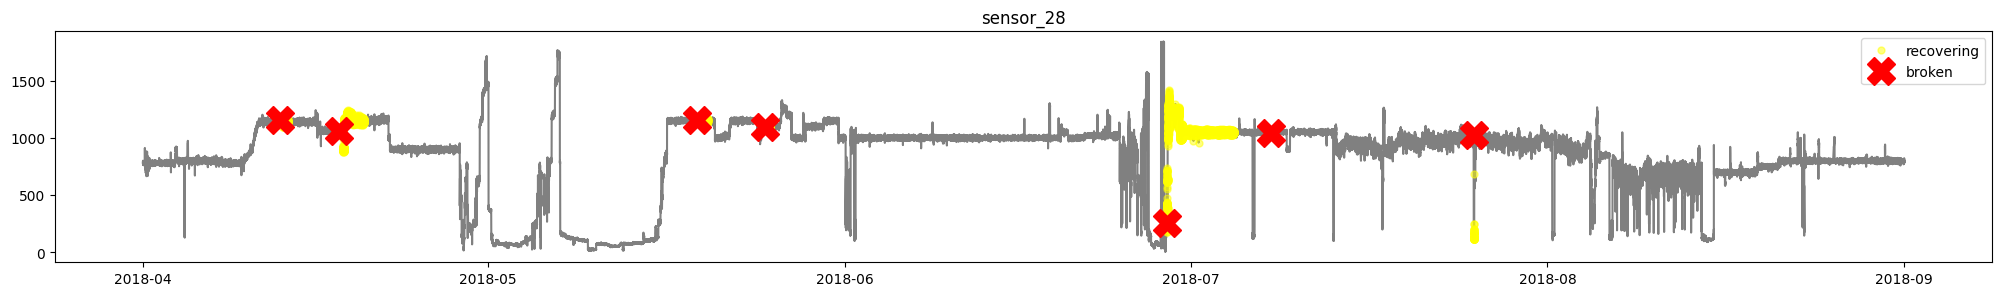

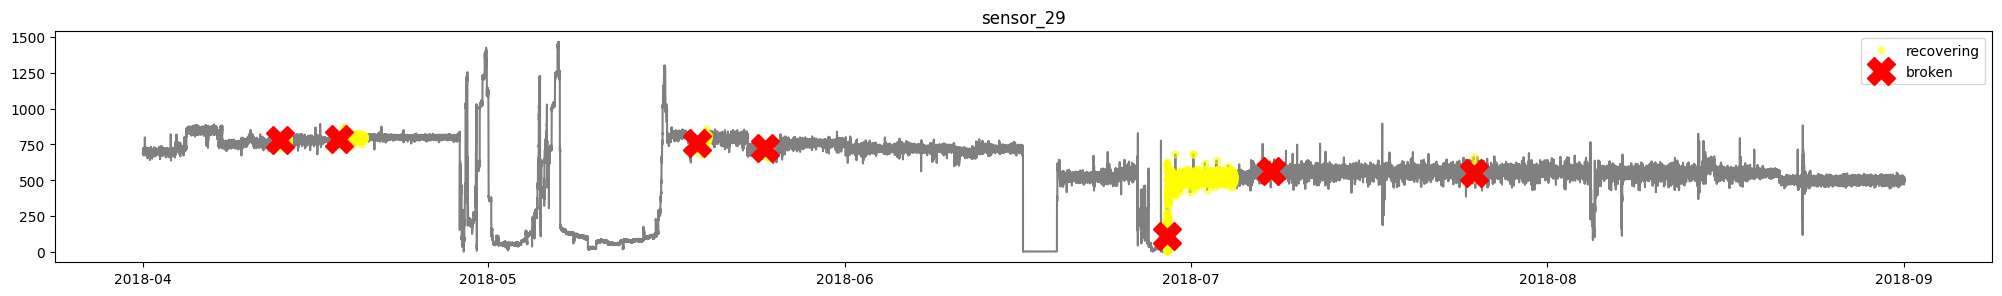

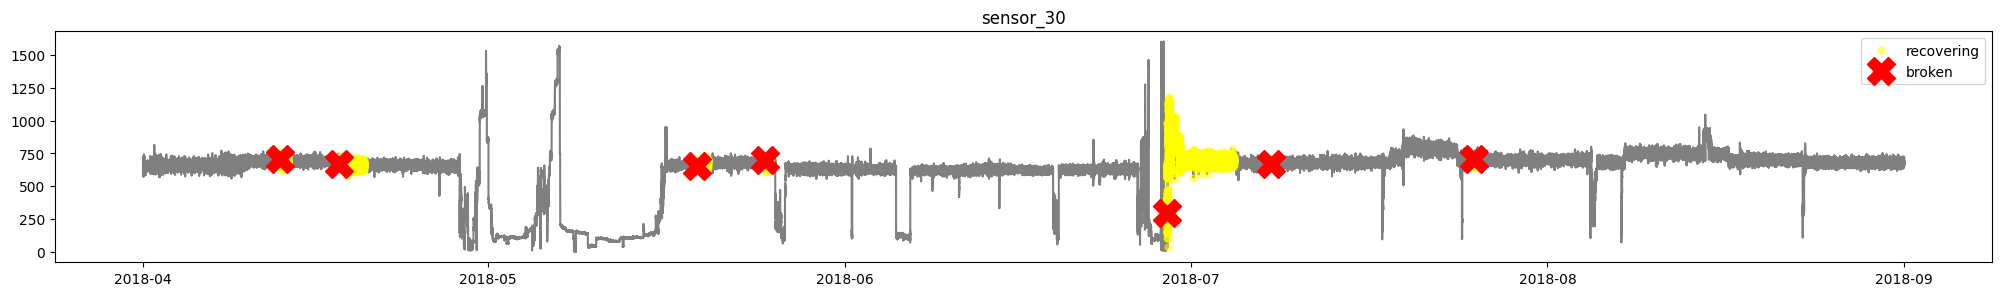

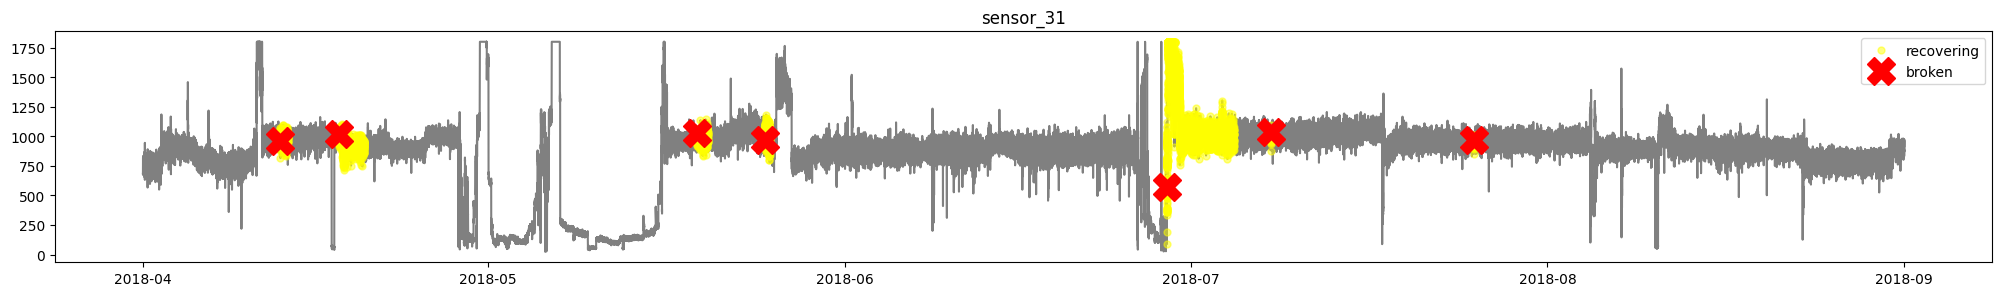

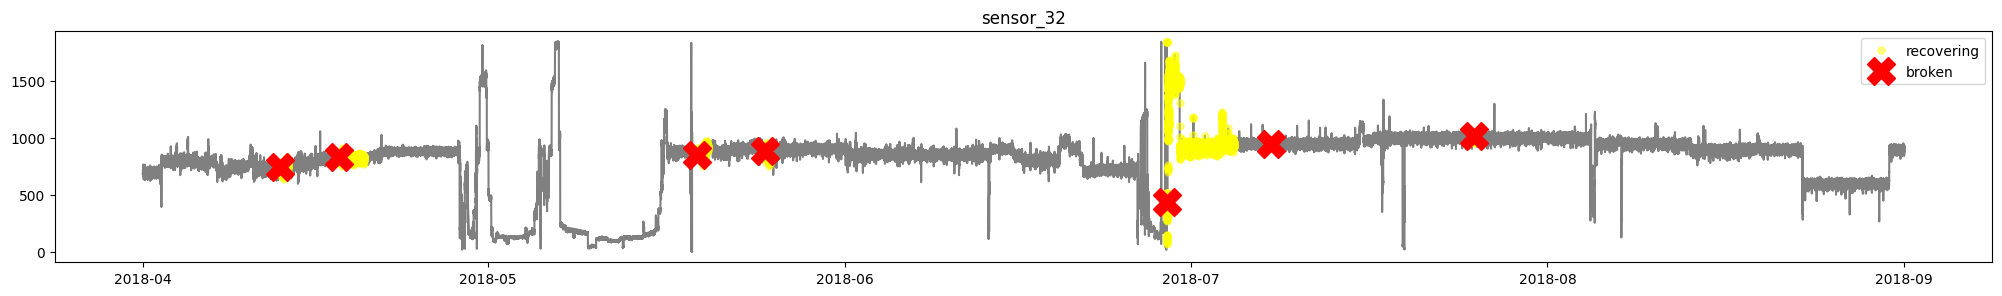

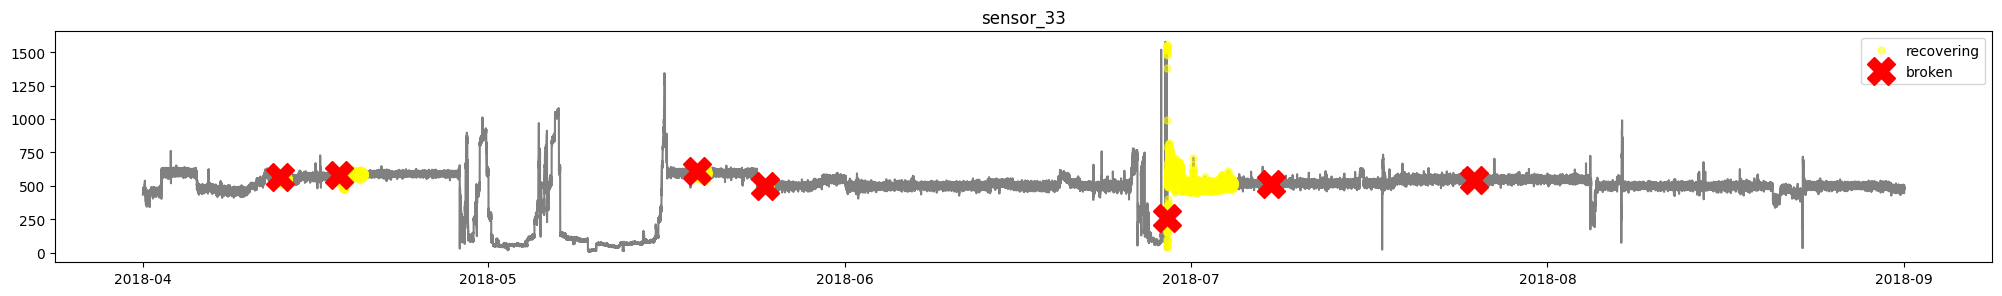

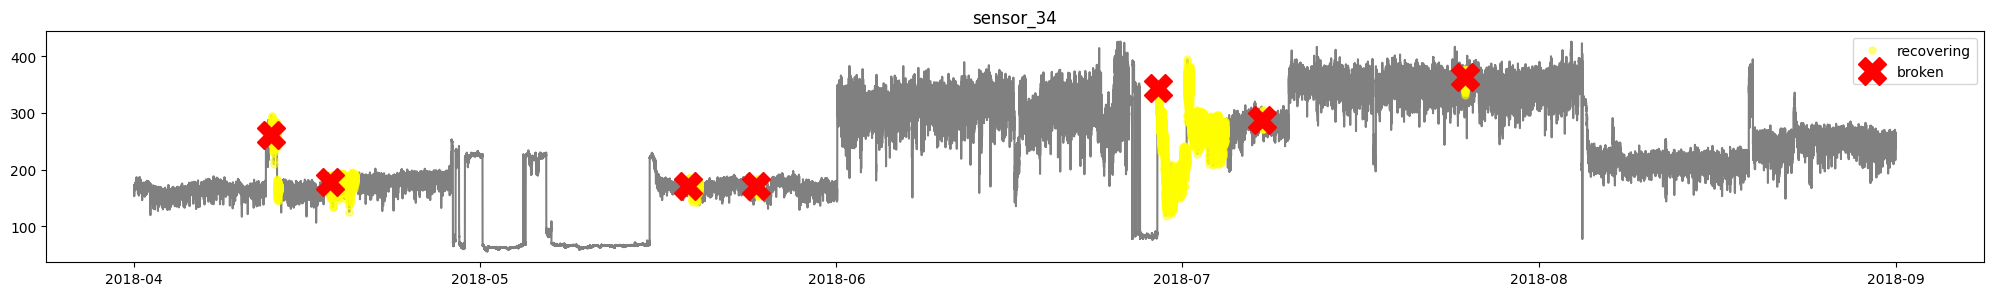

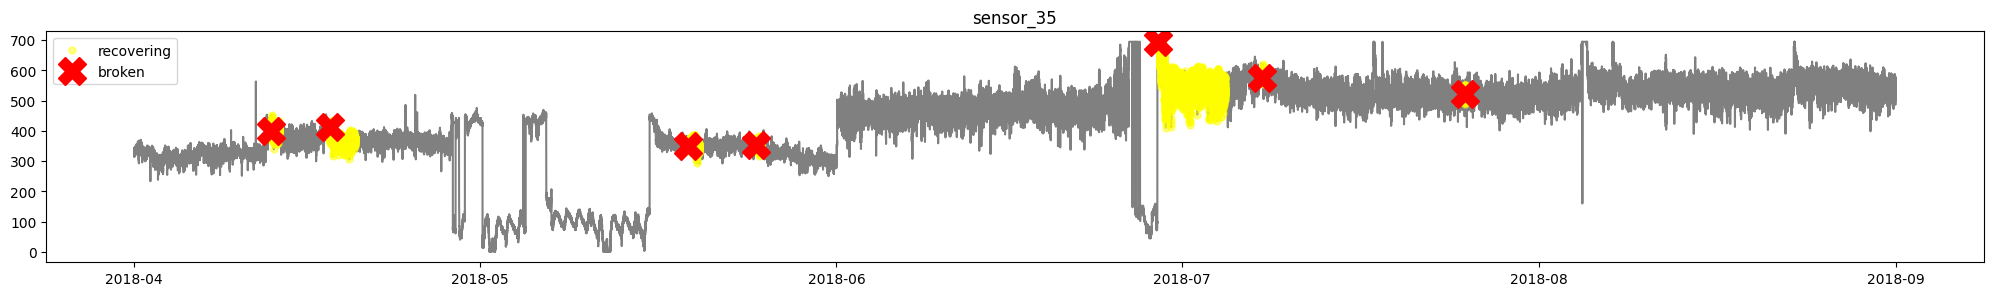

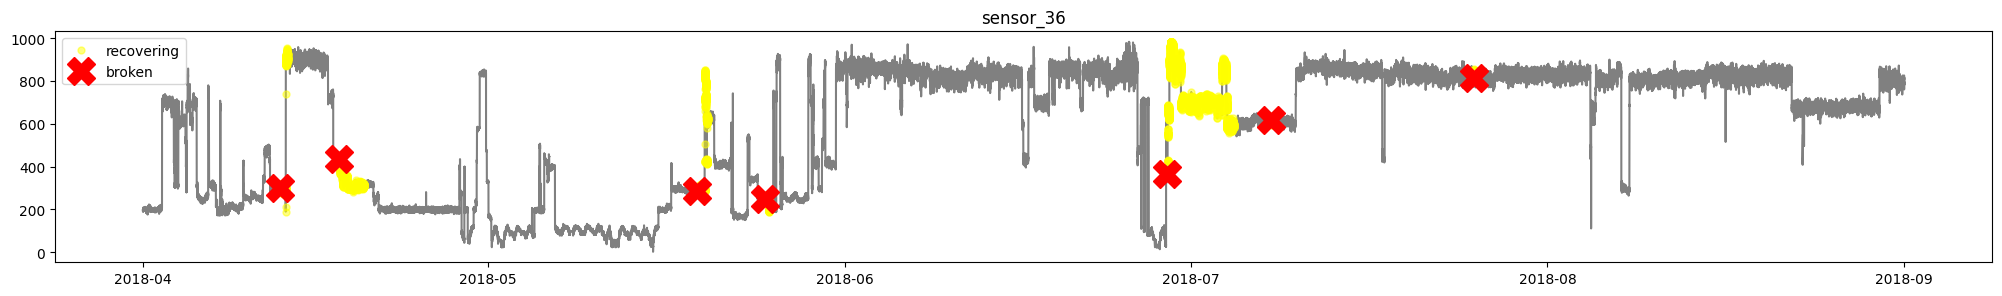

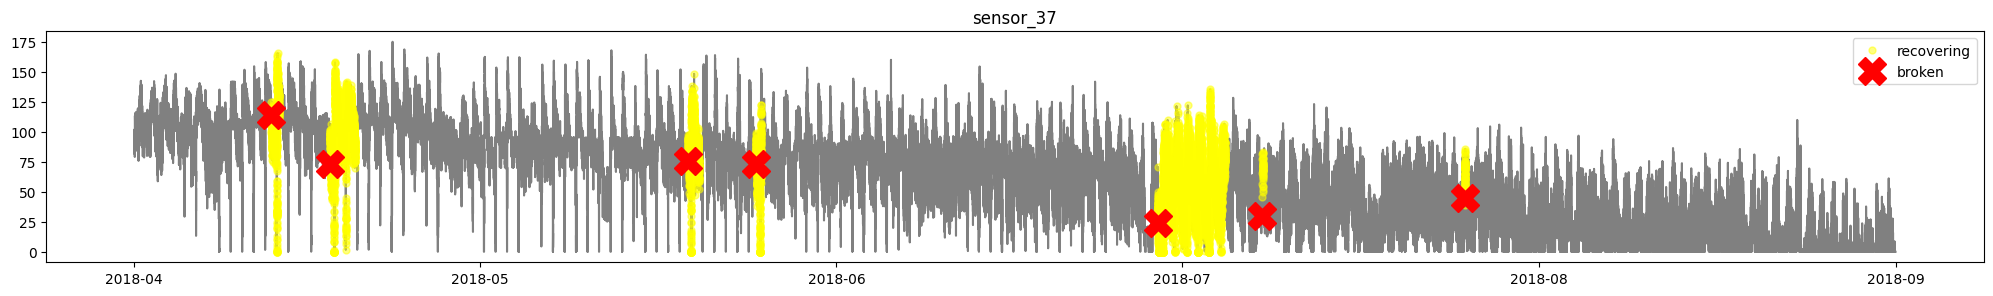

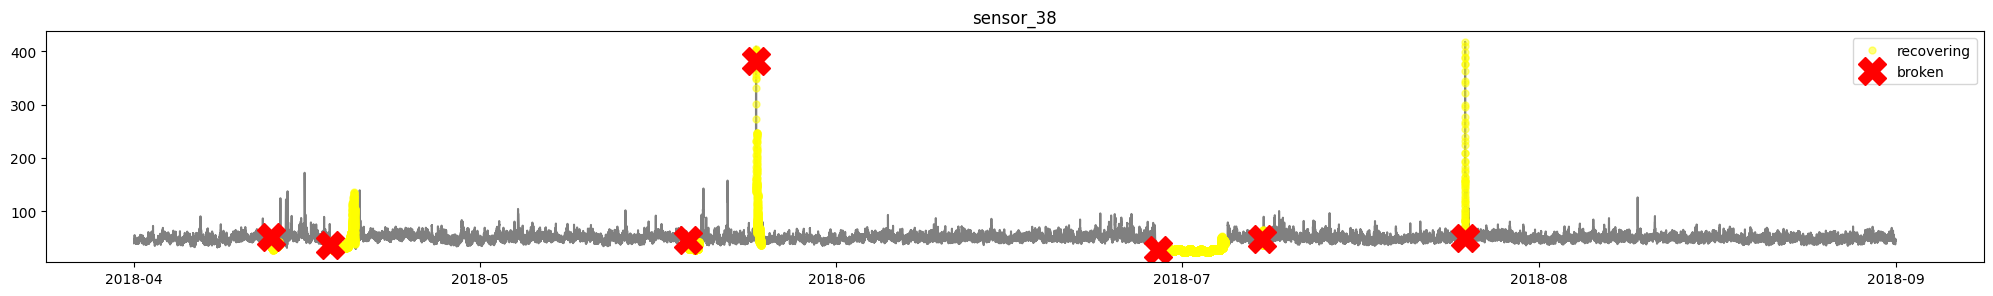

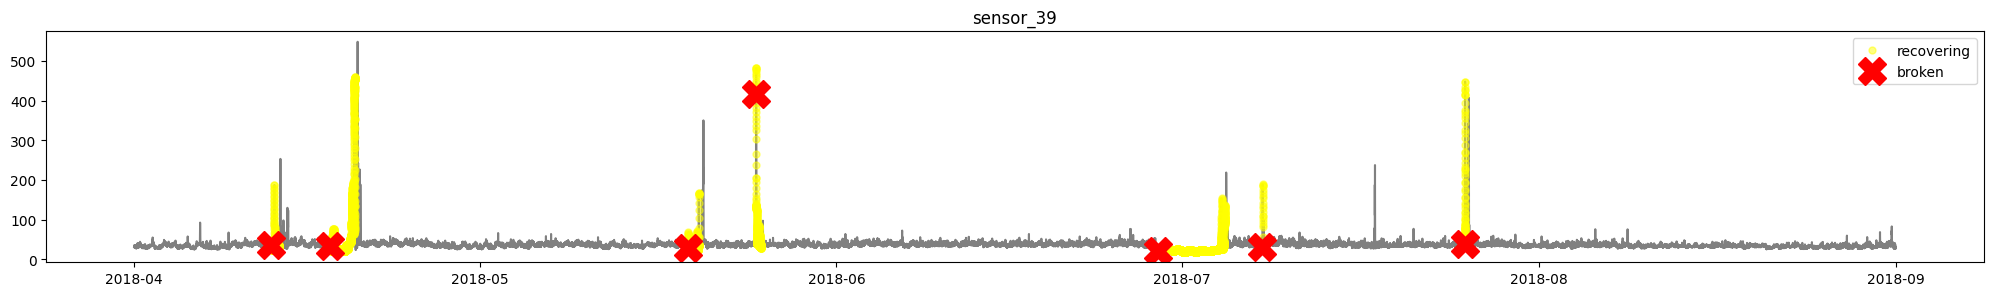

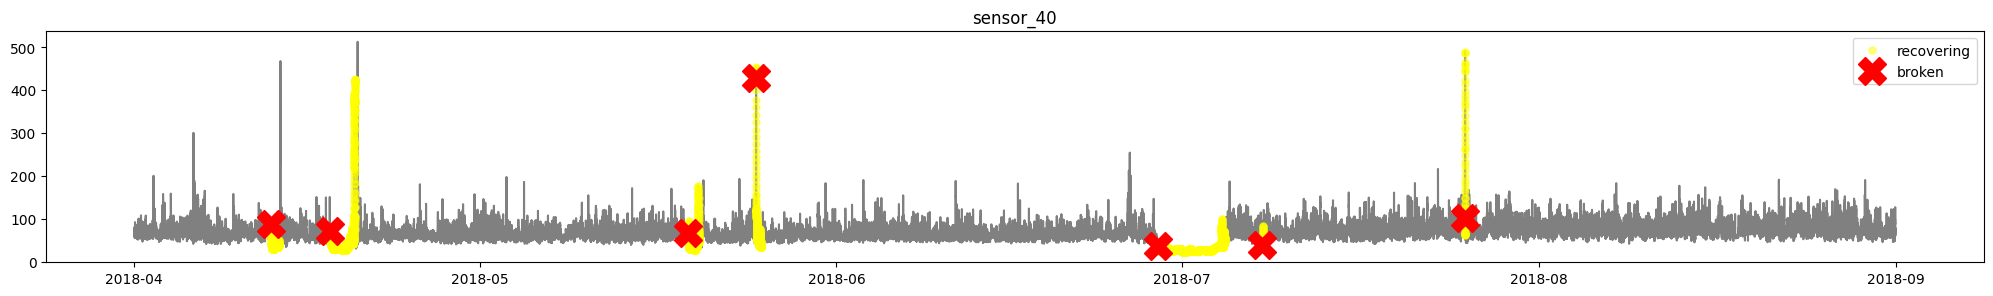

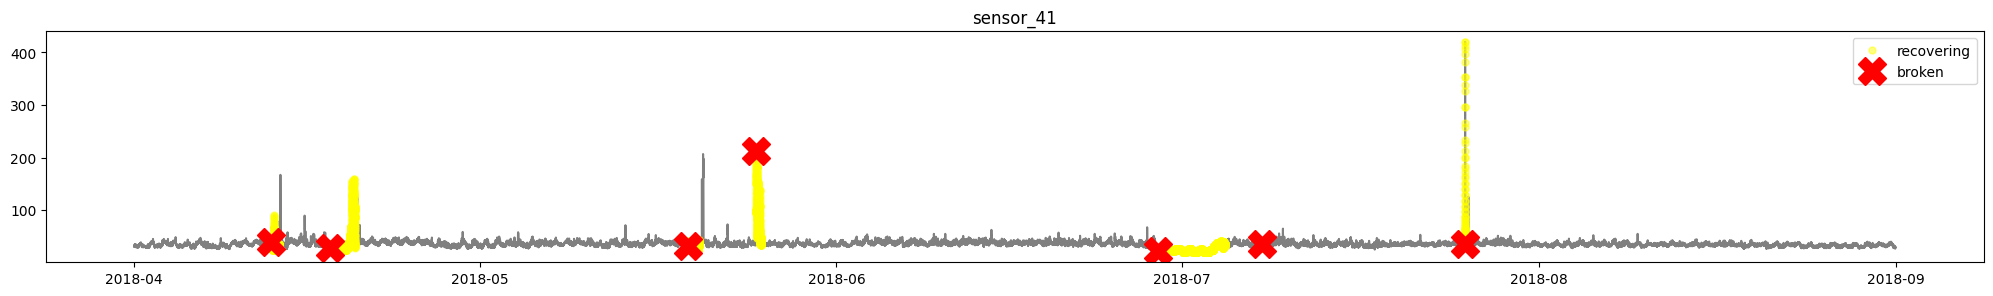

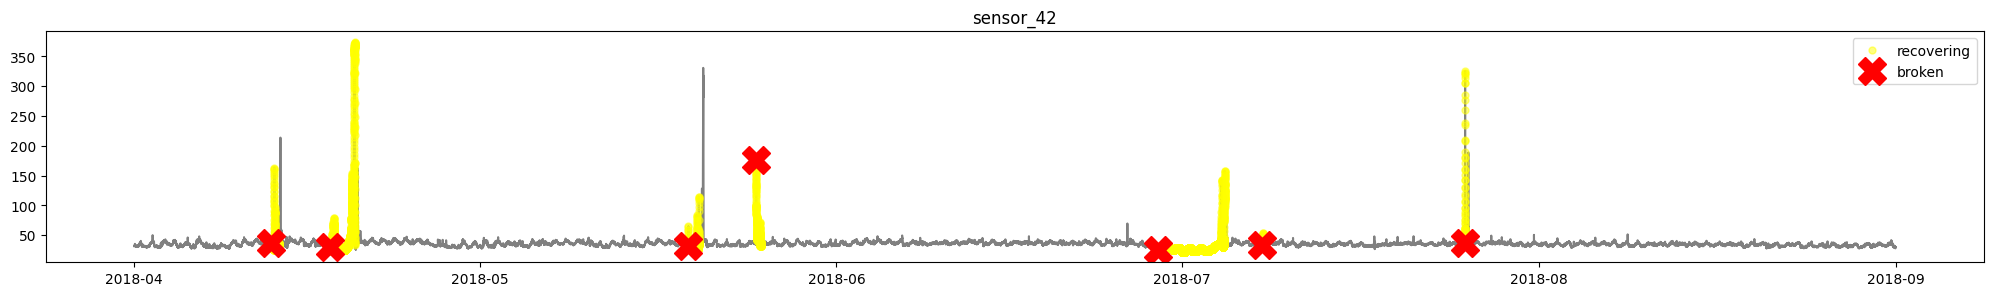

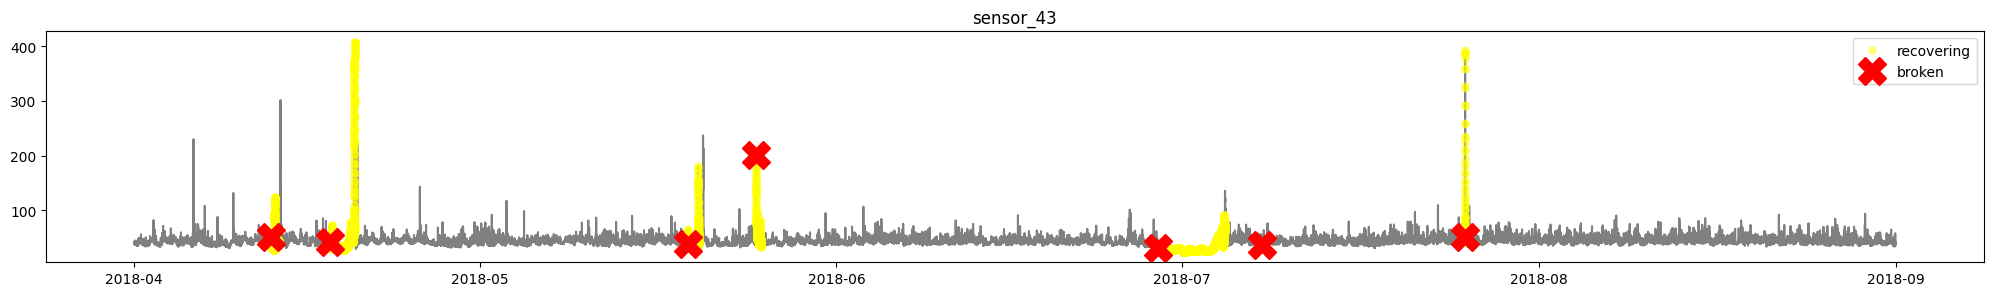

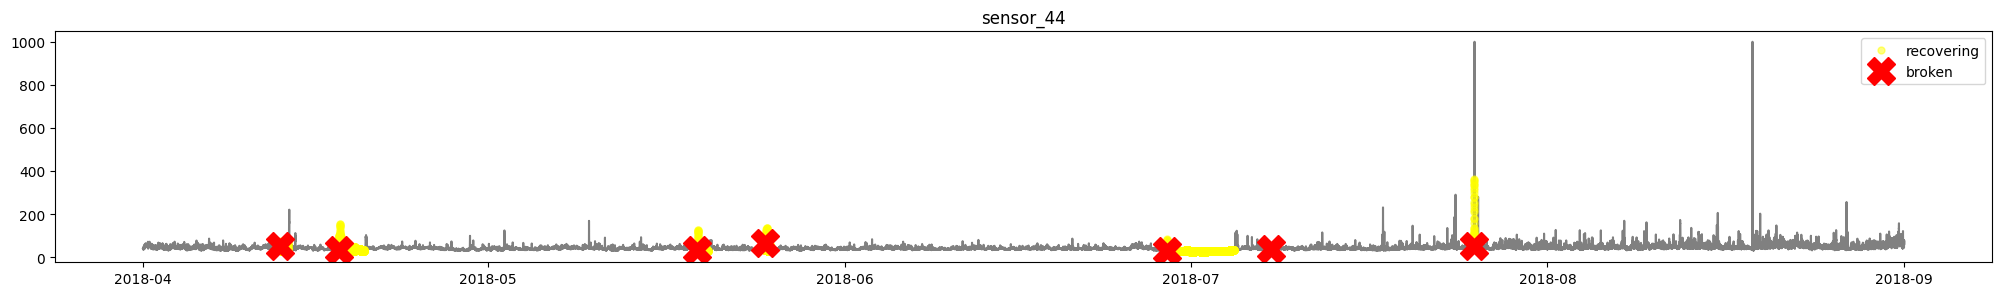

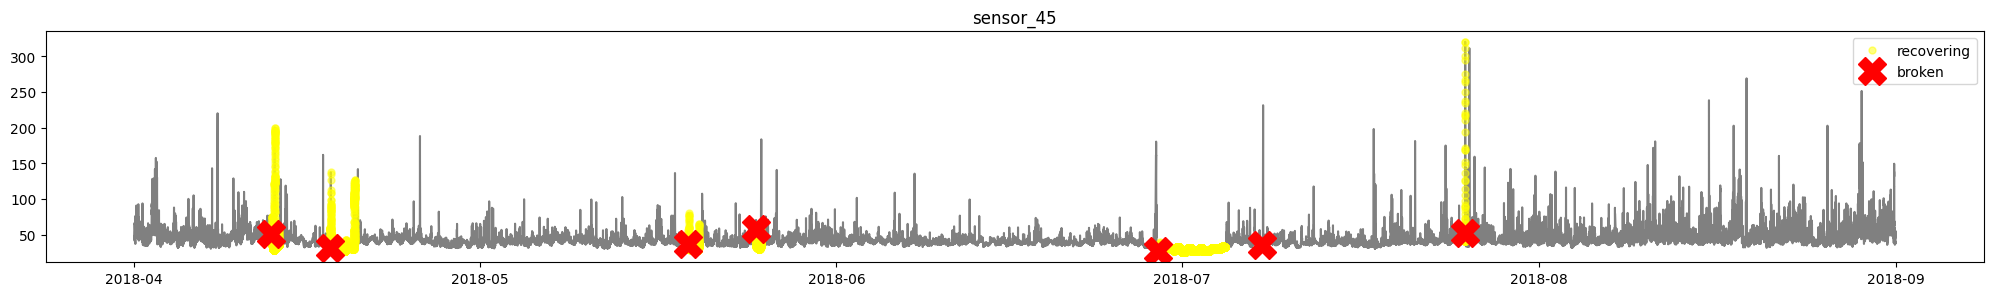

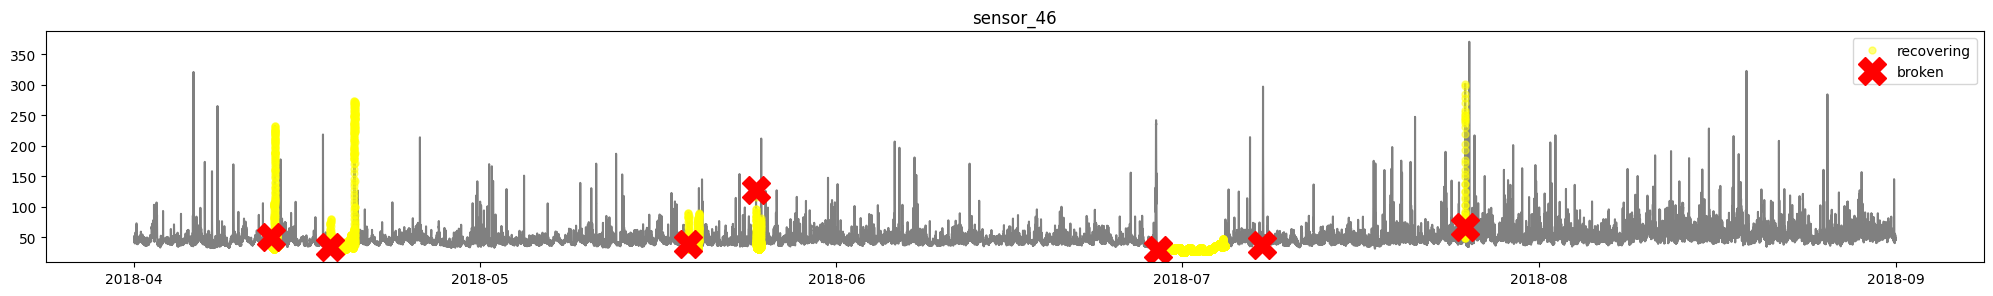

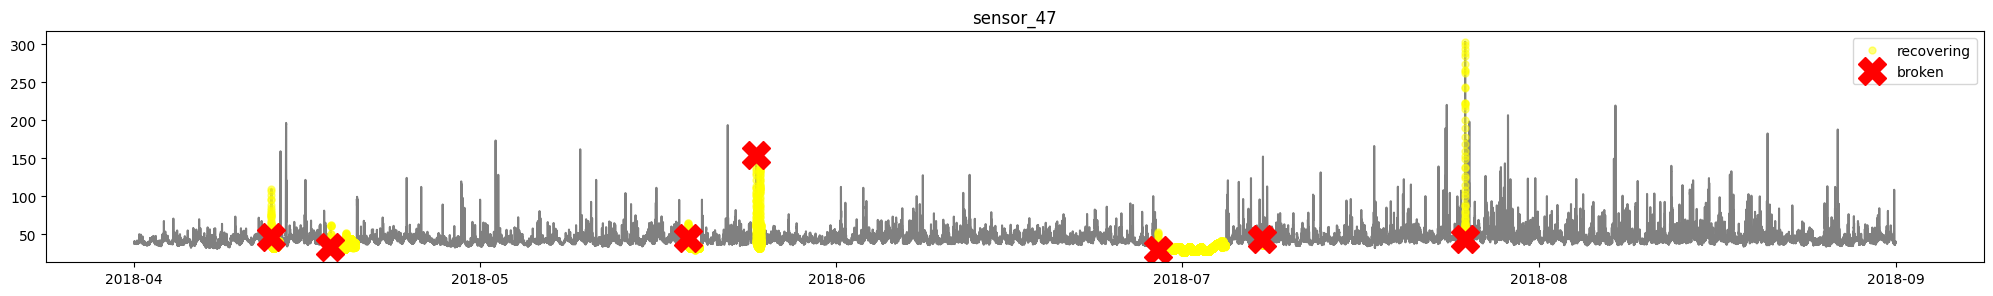

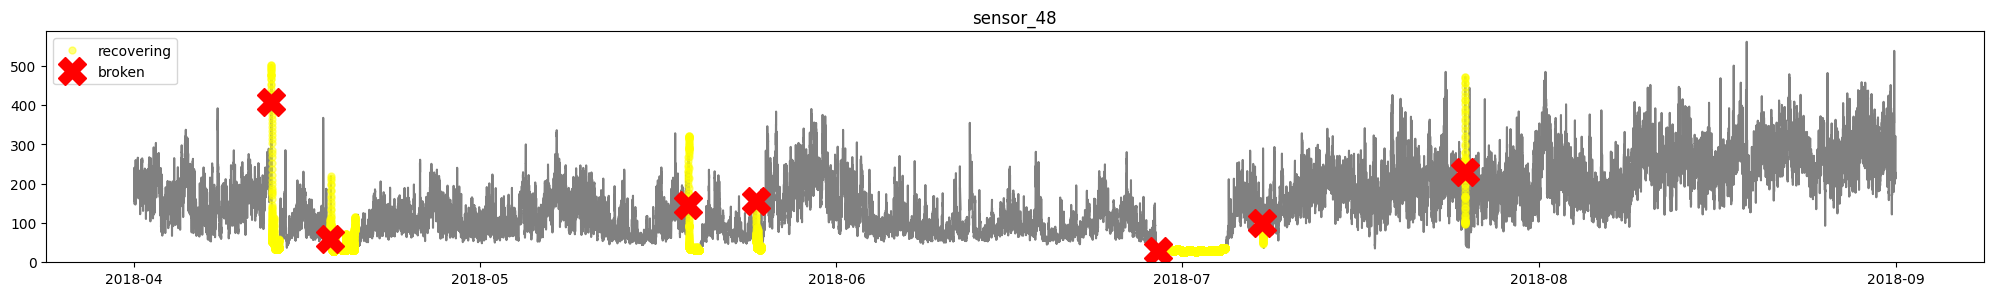

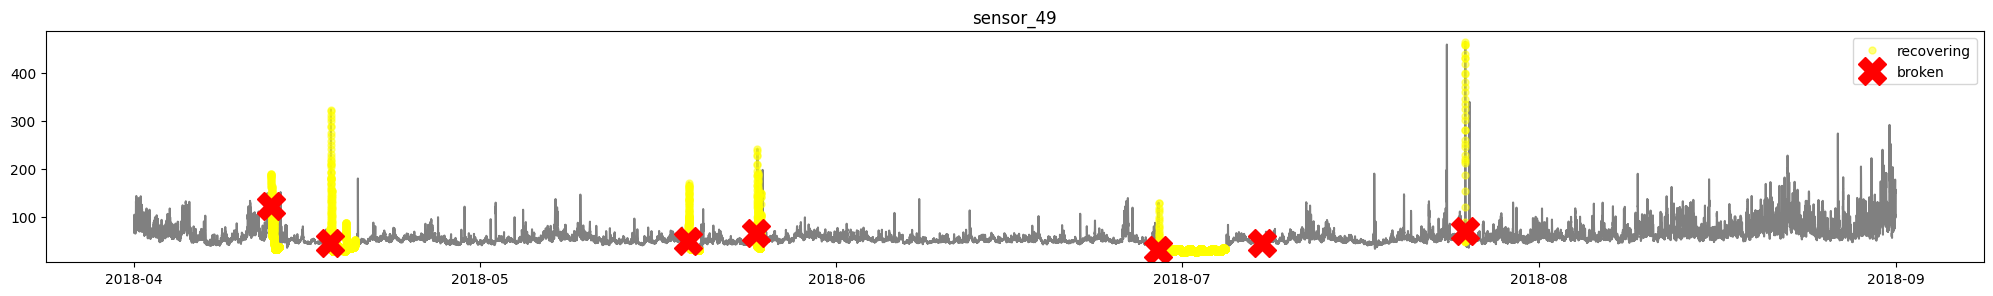

In [19]:
# implement the fillna and make the plot after that
corrected_df = df_imputer(df)
sensor_names = corrected_df.columns[:49]
plot_sensor_anomolies(corrected_df, sensor_names)

Afret this stage, one can use different methods to refine the dataset, and eliminate a portion of noises in it. the method used in the original study case notebook is standardizing; however, beside this technique one can use other techniques to improve the outcome of the Anomaly detection algorithms. Consequently, in the following part, first, similar to the original notebook, only standardizing will be implemented. Then, the mentioned technique will used beside outlier removal, resampling and aggregation, and smoothing techniques.The result of each section will be analyzed, and the best method among all will be determined. Finally, by using the best method, and utilizing feature engineering technique SelectKBest (get help from supervised machine-learning) the anomaly detection methods will be run and the outcome will be evaluated.

## 1- Using Standardizing
At the end, one can normalize or centralize the dataset :


In [20]:
# Standardizing the dataset
corrected_df.iloc[:,:49] = corrected_df.iloc[:,:49].apply(lambda x: (x - x.mean()) / x.std())

### Anomally Detection Algorithms
In this section, following the study_case_Anomaly_Detection.ipnyb, different Anomaly detection algorithms will be implemented and at the end the results will be compared with the results of this notebook.

In [125]:
def choosing_anomaly_method(df, methods_names):
    algorithm_list = []

    if type(methods_names) != list:
        methods_names = [methods_names]
        print(methods_names)

    normal_rows = df[df['machine_status']=='NORMAL']
    outliers_fraction = 1 - (len(normal_rows)/(len(df))) 

    anomaly_algorithms = {
        "Isolation Forest": IsolationForest(contamination=outliers_fraction, n_jobs = -1),
        "One-Class SVM": svm.OneClassSVM(nu=outliers_fraction),
        "Local Outlier Factor": LocalOutlierFactor(contamination=outliers_fraction, n_jobs = -1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "DBSCAN": DBSCAN(eps=1.8, min_samples=18)}


    
    for name in methods_names:
        print(name)
        algorithm_list.append((name, anomaly_algorithms[name]))
    
    return algorithm_list


In [124]:
def anomaly_detection_methods(df, methods_names):

    anomaly_algorithms = choosing_anomaly_method(df, methods_names)

    for name, algorithm in anomaly_algorithms:
        print(algorithm)

        if name == "Local Outlier Factor" or  name == "DBSCAN":
            y_pred = algorithm.fit_predict(df.iloc[:, :49])
            y_pred = np.where(y_pred!=-1,1,-1)
        else:
            y_pred = algorithm.fit(df.iloc[:, :49]).predict(df.iloc[:, :49])
        
        df[f'{name}'] = y_pred
        print('-'*100)
        print(f'number of anomolies detected')
        print(df[f'{name}'].value_counts())
        print('-'*100)

    return df


In [44]:
corrected_df = anomaly_detection_methods(corrected_df, 
            ["Isolation Forest", "One-Class SVM", "Local Outlier Factor", "Robust covariance", "DBSCAN"])

IsolationForest(contamination=0.06574074074074077, n_jobs=-1)


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
Isolation Forest
 1    205836
-1     14484
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
OneClassSVM(nu=0.06574074074074077)
----------------------------------------------------------------------------------------------------
number of anomolies detected
One-Class SVM
 1    205830
-1     14490
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
LocalOutlierFactor(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
Local Outlier Factor
 1    205836
-1     14484
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------

Running this program takes about 50 to 60 minutes, so it is wise to save the outcome of these algorithms.

In [21]:
#save results
filename = 'D:\\Data Science for Life Science\\Machine Learning and Deep learning\\Machine_learning_assignments\\Unsupervised_Learning\\Third_Assignment\\outcome.csv'
corrected_df.to_csv(filename, index=False)

In [22]:
# for name, algorithm in anomaly_algorithms:
#    anomoly_rows = df_results[df_results[f'{name}'] == -1]
#    print(anomoly_rows[['machine_status', f'{name}']])
# df = pd.read_csv('outcome.csv')

Among the algorithms tested in the notebook, all except for One-Class SVM, successfully predicted the correct number of anomalies when considering the total number of anomalies as the sum of BROKEN and RECOVERING data points. Additionally, when considering the extra assumption made in the original notebook, which involved removing sensor-51 and utilizing downward filling technique, One-Class SVM only counted one additional anomaly, which is reasonable compared to the five extra anomalies detected by the original notebook.

### Analaytical Methods 
Moreover, it is also important to consider the number of correctly detected anomalies for each method as a measure of their validation. In other words, since each method can mistakenly classify a normal point as an anomaly, it is crucial to determine which method identifies the highest number of true anomalies accurately.

In [128]:
def anomaly_counter(df):
    status_df = pd.DataFrame(df.groupby('machine_status'))

    for number in range(len(status_df[0])):
        print(f'the predictions for {status_df.iloc[number, 0]}:')
        assistant_df = status_df.iloc[number, 1]
        assistant_df = assistant_df.iloc[:, 50:]
        unique_counts = assistant_df.apply(lambda x: x.value_counts()).T
        print(f'{unique_counts}\n')

In [ ]:

anomaly_counter(corrected_df)

To begin with, none of the methods can accurately predict the number of anomalies of BROKEN category. The most successful estimations were achieved by One Class SVM (OCSVM) and Local Outlier Factor (LOF), correctly identifying four anomalies. Isolation Forest (IF) followed closely, correctly predicting two anomalies. However, the Robust Covariance (RC) method failed to predict any anomalies.

In terms of the RECOVERING category, IF predicted the highest number of anomalies, correctly identifying 5,344 out of 14,477 cases. OCSVM estimated slightly fewer anomalies, around 4,904 out of 14,477 (approximately 3% less). Conversely, the other two methods performed poorly in predicting anomaly points for this category.

The same trend persisted for the NORMAL category, with IF emerging as the top-performing method, accurately predicting 196,698 normal points out of 205,836. OCSVM claimed the second position but with less accuracy in separating normal data points. LOF and RC once again demonstrated weak performance in this category.

Overall, while all the methods could detect the total number of outliers, only IF and OCSVM managed to identify 36% of the true anomalies. LOF found approximately 15% of the true anomalies, while RC failed to detect even a single correct anomaly.

In conclusion, non of the methods could perform strongly to detect anomalies for this dataset, but the best results was made by IF and after it OCSVM.

In the next step, I will use machine status plots to find the probable reasons of the low quality of the results.

Using this plot, my first objective is to identify the disparities among the anomalies detected by each method. I will examine the spots identified by each method as anomalies and investigate the underlying factors contributing to the differences. Additionally, I will generate separate plots for the various sensor types and perform a comparative analysis between them.

The fourth sensor appears to exhibit minimal noise and distinct patterns during pump breaking incidents. Therefore, it can be considered a suitable candidate for comparing the performance of anomaly detection algorithms.

It is worth noting that the predicted anomaly spots remain consistent regardless of the sensor used. The only variation lies in the behavior of the sensor dataset itself. As a result, the choice of sensor does not significantly affect the identification of differences between the methods' performance, as they all pinpoint the same time spots across the entire dataset.

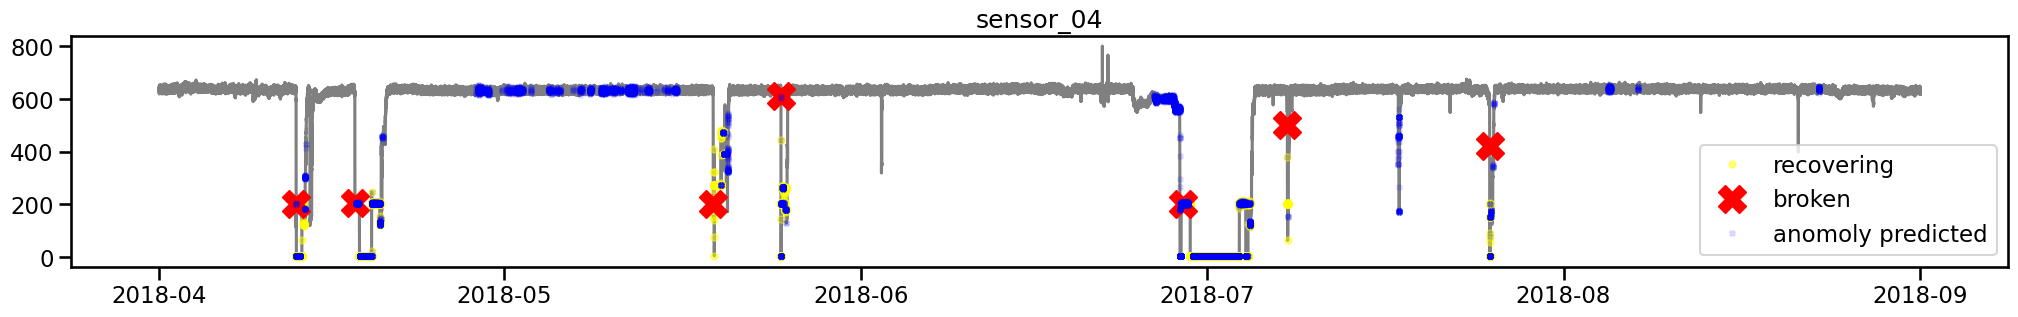

In [25]:
# plot Isolation Forest
plot_sensor_anomolies(corrected_df, 'sensor_04', 'Isolation Forest')

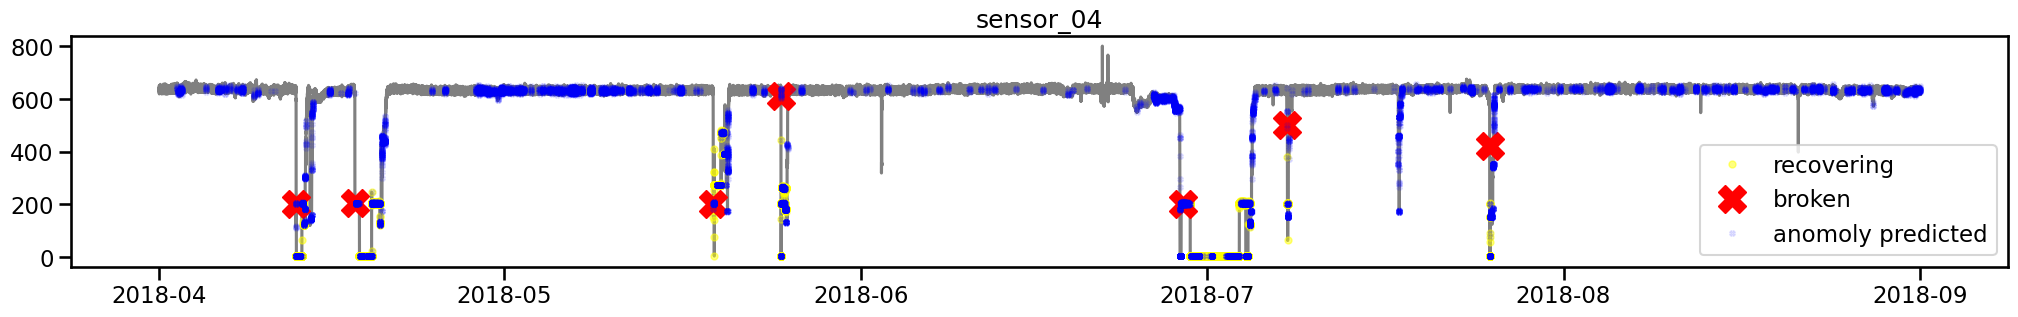

In [26]:
# plot One-Class SVM
plot_sensor_anomolies(corrected_df, 'sensor_04', 'One-Class SVM')

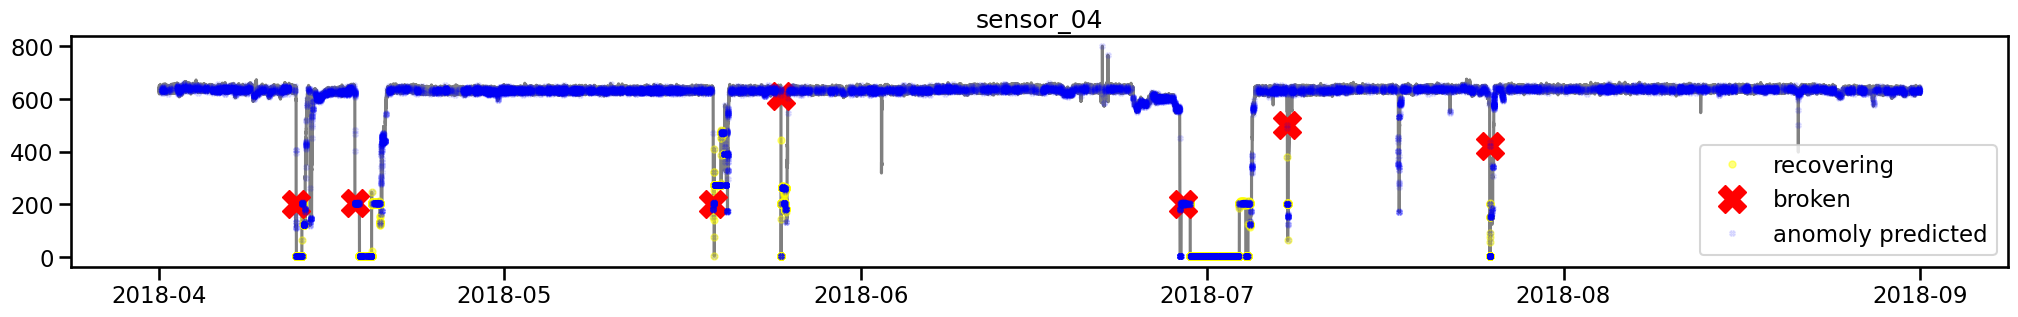

In [27]:
# plot Local Outlier Factor
plot_sensor_anomolies(corrected_df, 'sensor_04', 'Local Outlier Factor')

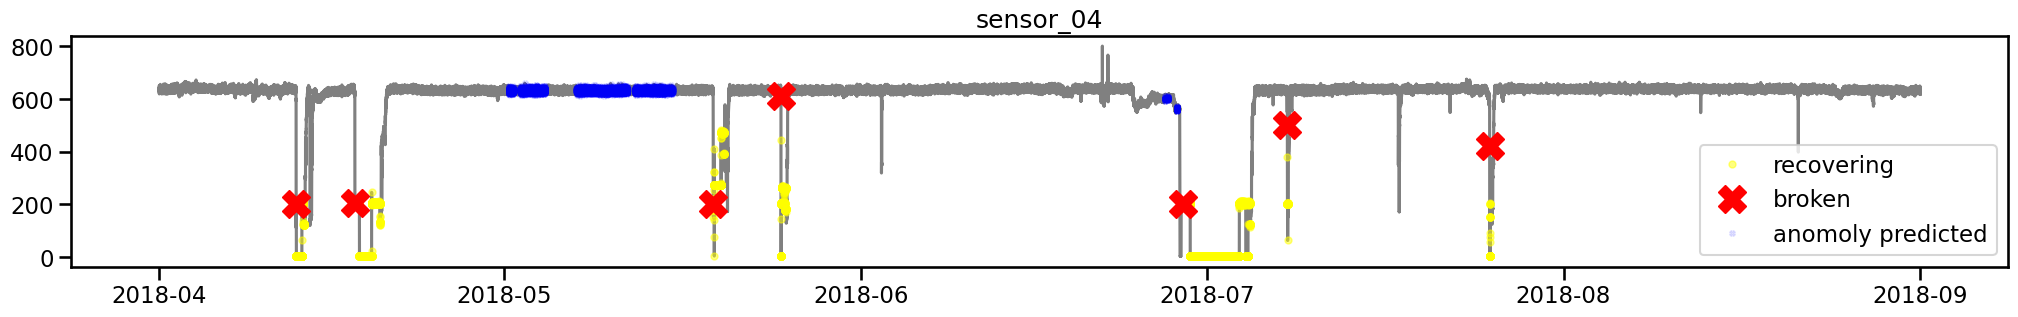

In [28]:
# plot Local Outlier Factor
plot_sensor_anomolies(corrected_df, 'sensor_04', 'Robust covariance')

Based on the plotted results, as expected, Isolation Forest (IF) demonstrates the best performance on this dataset by successfully detecting at least six anomaly spots. However, it falls short in two aspects. Firstly, it fails to detect the entire anomaly spots, only identifying certain points within the mentioned six spots, and it does not detect any points for the anomaly spot after 2018-07. Secondly, IF incorrectly identifies numerous normal data points as anomalies, particularly within the large normal spot around 2018-5.

Regarding One-Class Support Vector Machine (OCSVM), while it manages to detect some points within all seven anomaly spots, it also misclassifies a significant number of normal points as anomalies. The most concerning issue is that these misclassified points are distributed throughout the entire dataset, and OCSVM does not identify specific spots like IF does.

On the other hand, the Local Outlier Factor (LOF) method appears to detect points without any preference for being normal or anomaly throughout the dataset. In other words, LOF can identify some anomaly points within the anomaly spots, but it fails to distinguish between these spots and normal spots since the detected data points are evenly distributed throughout the dataset.

Finally, the Robust Covariance (RC) method proves to be ineffective in detecting any anomaly data points within the dataset, making it the least suitable method for this particular task.

The final part of this analysis involves comparing the machine status plots for different types of sensors and attempting to identify the reasons why none of the methods performed well on this dataset. 

In general, there are four distinct types of sensor plot patterns in this dataset. The first pattern belongs to sensors 0, 4 to 12. The second pattern belongs to sensors 14 to 36, while the third pattern is observed in sensors 38 to 49. Additionally, there is a fourth group characterized by irregular patterns, where each member has its own unique and noisy pattern. This group comprises five sensors: 1, 2, 3, 13, and 37.

Consequently, in this part, one representetive of each pattern will be sketched, and a comparison will be done bsed on their similarities and differences. The used anomaly detection method in this case if IF since it is the most informative one.

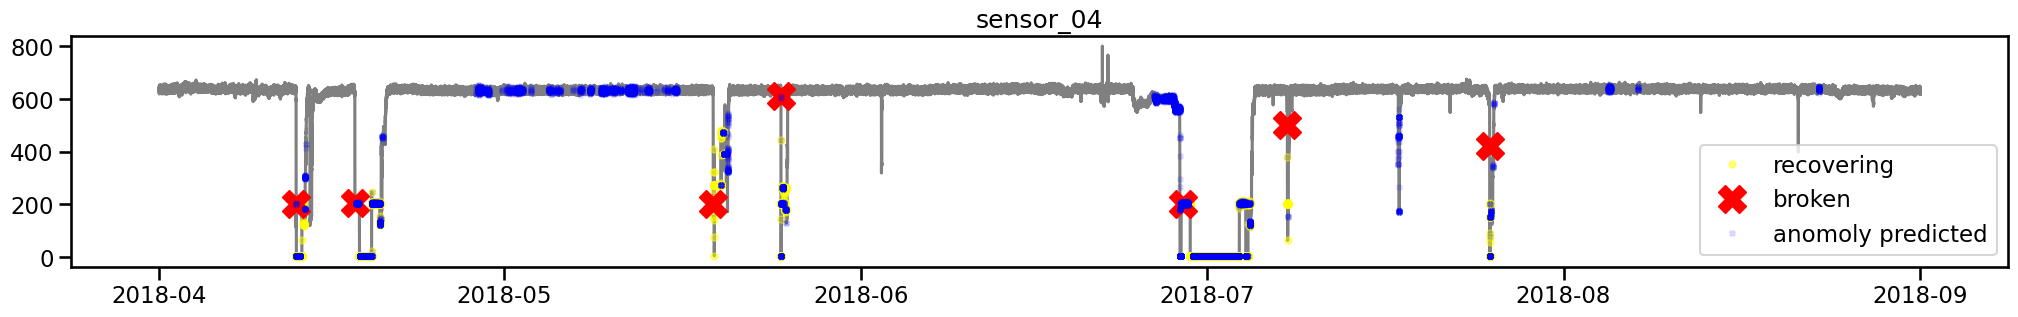

In [29]:
# plot Isolation Forest
plot_sensor_anomolies(corrected_df, 'sensor_04', 'Isolation Forest')

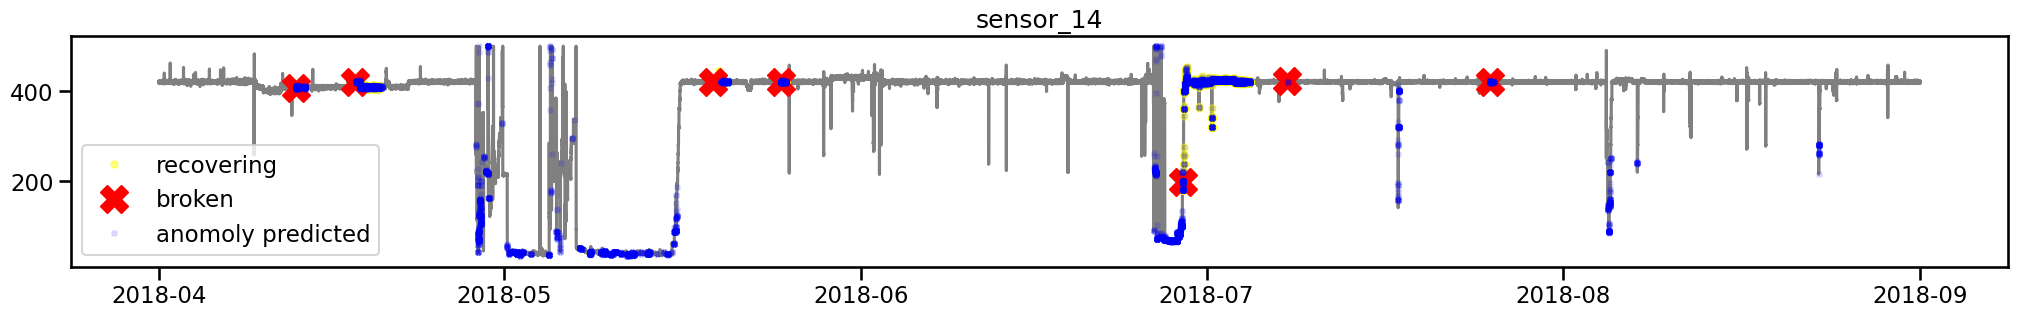

In [30]:
# plot Isolation Forest
plot_sensor_anomolies(corrected_df, 'sensor_14', 'Isolation Forest')

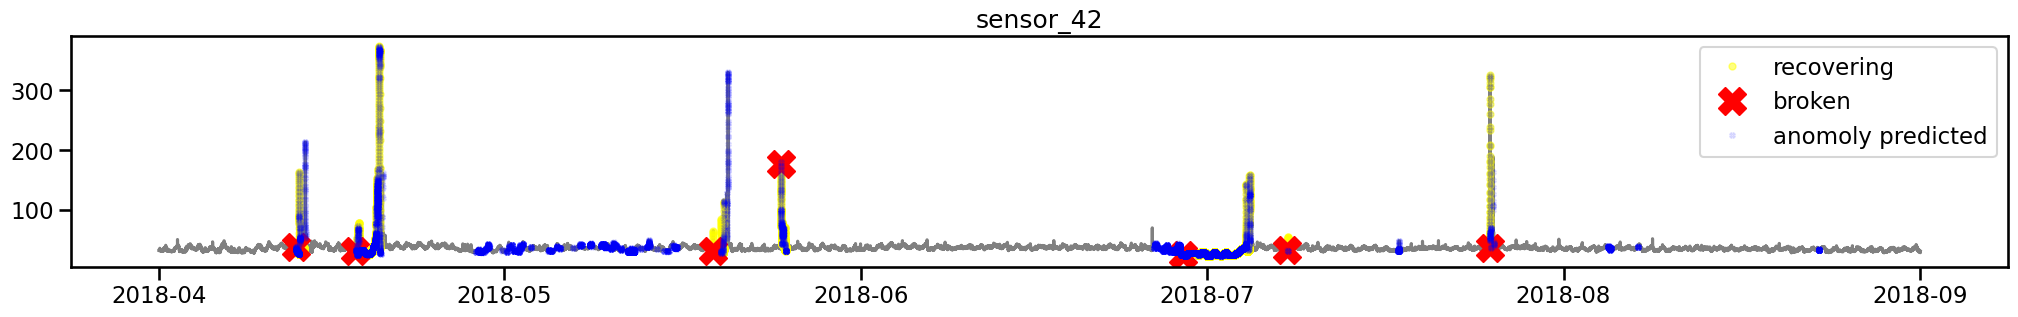

In [31]:
# plot Isolation Forest
plot_sensor_anomolies(corrected_df, 'sensor_42', 'Isolation Forest')

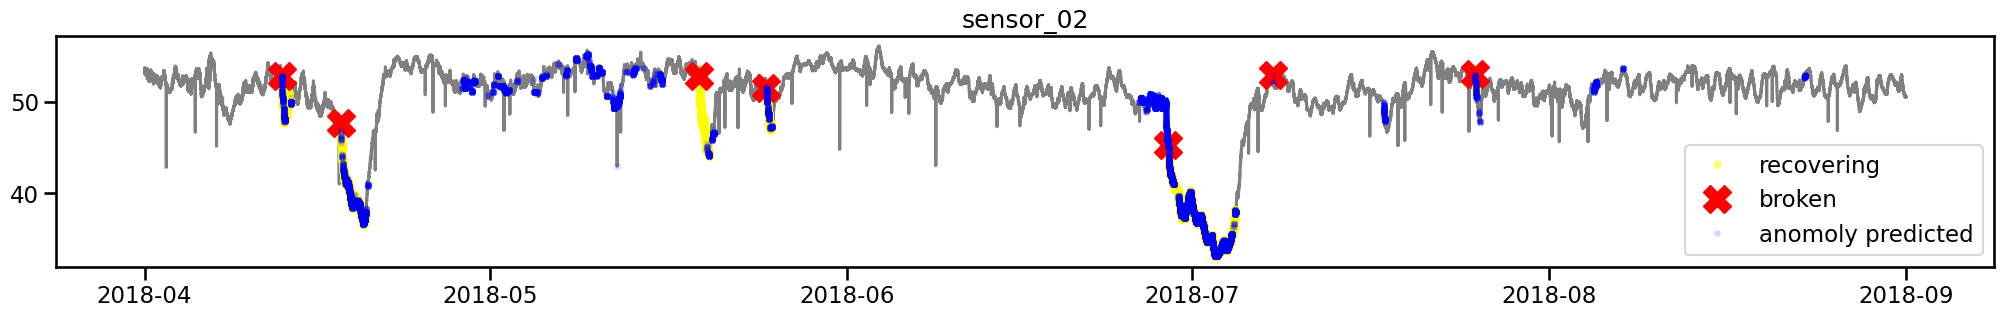

In [33]:
# plot Isolation Forest
plot_sensor_anomolies(corrected_df, 'sensor_02', 'Isolation Forest')

These patterns exhibit significant differences from one another, leading to varying impacts on the model during both training and testing phases. The first pattern demonstrates a constructive effect on accurately detecting anomalies, particularly during and after pump breakdown. This series of plots shows less abnormal behavior throughout this period.

The second pattern can be identified as the primary source of abnormalities in the methods' predictions. It contains numerous abnormal spots that do not correspond to pump breakdown or recovery, suggesting potential sensor malfunctions within this group.

Similar to the first group, the third pattern has a constructive impact on anomaly prediction. It exhibits normal behavior outside of the pump breakdown and recovery spots.

The last group can be characterized as the noisy group. While some plots within this group capture the general behavior of the pump during this period, they mostly contain noise, which contributes to prediction deficiencies.

Additionally, while the aforementioned plots exhibit lower noise levels, some of the other plots display a significant amount of noise, which can affect the performance of each anomaly detection method. This could explain why the Isolation Forest (IF) method outperforms the other methods. IF is generally less sensitive to outliers and noise compared to the other methods in this analysis.
 
Another significant concern within this dataset is the time period around 2018-05. By observing the plot of sensor14, it becomes evident that there is a significant cluster of outliers during this specific timeframe, which is not associated with any pump breakage or recovery events. The reason why this cluster stands out prominently in the dataset and is identified as an anomaly by the IF algorithm is due to the presence of this malfunction in 18 sensors, accounting for approximately 30% of all the sensors. As a consequence, the algorithm identifies this cluster as an anomaly. Additionally, there is another small cluster in the sensor 14-36 pattern in 2018-08, which also leads to the incorrect detection of an anomaly by the methods.

In conclusion, the best configuration for this dataset is by removing columns 1, 50, and 51, using backward filling imputing technique, and utilizing Isolation Forest as the anomaly detection technique. However, this can be correct if one wants to limit hiself to this platform without using any data refining techniques and extra analytical techniques after implementing the model. Consequently, to continue this assignment first some data refining techniques will implement  to decreas the amount of noises and unwanted abnormal behaviour, and then implement the mentioned technique again to compare the differences between the outcome of these methods.  

## 2- Outlier Removal:
One way to enhance the quality of the dataset is by utilizing the z-score technique, which has been previously implemented in this notebook. However, a technique that hasn't been employed is cropping the dataset based on the distance of data points to the z-score. Additionally, there are other outlier removal techniques based on various statistical methods, such as the MAD (Median Absolute Deviation) z-score, Interquartile Range (IQR) Method, and Percentile Method. These techniques can be utilized to remove outliers while preserving anomalies. However, for this specific dataset, I believe that this category of techniques may not be particularly useful. The reason is that the magnitude of the outliers or noise is of the same order as the anomaly datapoints, or sometimes even less than the anomaly datapoints. Consequently, if one attempts to crop the outliers using any of the mentioned techniques, there is a risk of removing a significant number of anomaly datapoints. This would result in the loss of most of the dataset's anomalies, weakening the effectiveness of anomaly detection techniques for this dataset. Nevertheless, I will implement one of the mentioned techniques (specifically, I will use the z-score outlier removal technique) and evaluate my hypothesis regarding its effectiveness.


In [215]:
# fill the nan values using backward imputation technique
corrected_df = df_imputer(df)

In [216]:
corrected_df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_41  sensor_42  sensor_43  sensor_44  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   30.98958  31.770832   41.92708  39.641200   
2018-04-01 00:01:00  ...   30.98958  31.770832   41.92708  39.641200   
2018-04-01 00:02:00  ...   30.46875  31.770830   41.66666  39.351852   
2018-04-01 00:03:00  ...   30.46875  31.510420   40.88541  39.062500   
2018-04-01 00:04:00  ...   30.98958  31.510420   41.40625  38.773150   

                     sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
timestamp                                                                    
2018-04-01 00:00:00   65.68287   50.92593  38.194440   157.9861   67.70834   
2018-04-01 00:01:00   65.68287   50.92593  38.194440   157.9861   67.70834   
2018-04-01 00:02:00   65.39352   51.21528  38.194443   155.9606   67.12963   
2018-04-01 00:03:00   64.81481   51.21528  38.194440   155.9606   66.84028   
2018-04-01 00:04:00   65.10416   51.79398  38.773150   158.2755   66.55093   

                     machine_status  
timestamp                            
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 50 columns]

In [197]:
def z_score(df, threshold):
    # Calculate z-score for the dataset
    zscore_df = df.apply(lambda x: np.abs((x - x.mean()) / x.std()))
    return df[zscore_df <= threshold], df[zscore_df >= threshold]

def mad_zscore(df, threshold):
    # Calculate the Median Absolute Deviation (MAD)
    median_val = np.median(df)
    abs_dev = np.abs(df - median_val)
    mad = np.median(abs_dev)

    # Calculate the Modified Z-Score for each data point
    diff_from_median = df - median_val
    mad_df = 0.6745 * diff_from_median / mad

    return df[mad_df <= threshold], df[mad_df >= threshold]  

def interquartile(df, threshold):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
        
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
        
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
        
    # Return the dataset without outliers
    return df[(df >= lower_bound) & (df <= upper_bound)], df[(df <= lower_bound) & (df >= upper_bound)]   

In [203]:
def outlier_removal(df, name, threshold, interpolate=True, outlier=False, standardization=False):
    float_df = df.iloc[:,:49]

    # implement z-score
    if name == 'z-score':
        
        main_df, outlier_df = z_score(float_df, threshold)
    
    # implement MAD z-score
    elif name == 'MAD':
        main_df, outlier_df = mad_zscore(float_df, threshold)

    # implement Intequartile Range
    elif name == 'Interquartile':
        main_df, outlier_df = interquartile(float_df, threshold)

    # if outlier dataframe is needed return it
    if outlier == True:
        df.iloc[:,:49] = outlier_df
        return df

    # return the main datafram
    float_df = main_df

    # interpolate or fill the Nan values
    if interpolate == True:
        float_df = float_df.interpolate(method='linear')
    else:
         float_df = float_df.fillna(float_df.mean())

    # Standardize the dataset
    if standardization == True:
        df.iloc[:,:49] = float_df.apply(lambda x: np.abs((x - x.mean()) / x.std()))
    else:
        df.iloc[:,:49] = float_df
    return df

In the following steps, first, the outlier data frame will be sketch to evaluate how much noise or how many anomaly datapoints is lost during the outlier removal process, then the refined dataframe will be sketched, and the anomaly detection technique will be used. 

In [139]:
outlier_df = outlier_removal(corrected_df, name='z-score', threshold=2,
                              interpolate=False, outlier=True, standardization=False)


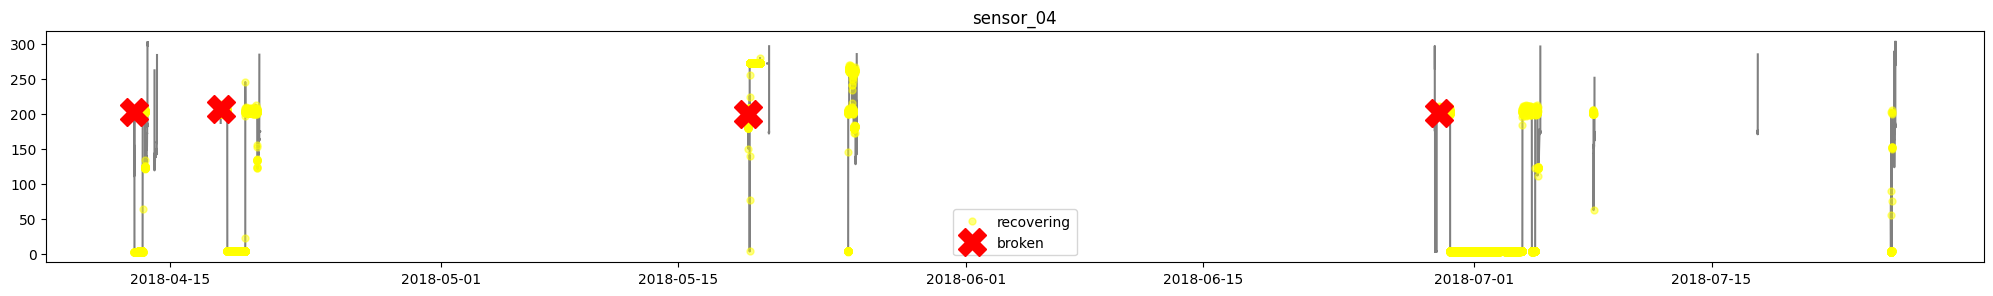

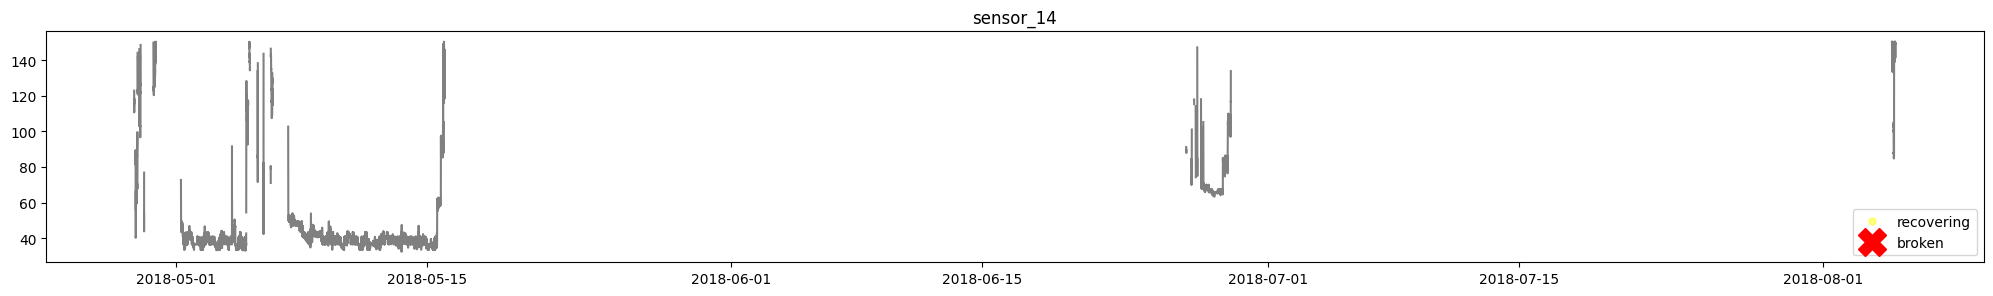

In [140]:
# plot two representative sensors
plot_sensor_anomolies(outlier_df, ['sensor_04'])
plot_sensor_anomolies(outlier_df, ['sensor_14'])

As a representator of the whole dataset, sensor-12 and sensor 14 are sketched here, and rest of the plots roughly obey these two patterns. In other words, in some of them many anomalu datapoints are removed, while in others noises are lost. Consequently, an adequate amount of noise is removed from the dataset; however, a noticable amount of anomaly data is lost as well. This data loss may affect the outcome of the anomaly detection technique. To continue one can calculate the amount of anomaly data loss using the following function.

In [141]:
def finding_not_null_amount(df):

    # loop over all categories
    for status in df.machine_status.unique():
        temporary_df = df[df.machine_status == status]

        # sum over all the non-null values
        value_number = temporary_df.iloc[:,:49].notnull().sum().sum()
        a, b= temporary_df.iloc[:,:49].shape

        # find the percentage of nan-null values
        value_percent = value_number / (a * b)
        print(f'{status} category:\n numebr of values is {value_number}\n percentage regarding whole category:{value_percent.round(3)}\n')

In [142]:
finding_not_null_amount(outlier_df)

NORMAL category:
 numebr of values is 530396
 percentage regarding whole category:0.053

BROKEN category:
 numebr of values is 42
 percentage regarding whole category:0.122

RECOVERING category:
 numebr of values is 164761
 percentage regarding whole category:0.232



Approximately five percent of the normal data is identified as outliers by the algorithm, which is reasonable and beneficial considering these data points can be regarded as noise. However, a drawback of this method is that it also results in a loss of around 23 percent of recovering points and 12 percent of broken points. This loss could significantly impact the anomaly detection process. Moving forward, I will apply linear interpolation to the refined dataset and assess its impact on the Isolation Forest method. The reason for selecting the Isolation Forest technique for the remaining part of this study is twofold. Firstly, it offers faster processing compared to other techniques. Secondly, it is the most accurate technique for this study case as other unsupervised methods are highly sensitive to the presence of noise.

In [157]:
refined_df = outlier_removal(corrected_df, name='z-score', threshold=2, 
                               interpolate=True, outlier=False, standardization=False)

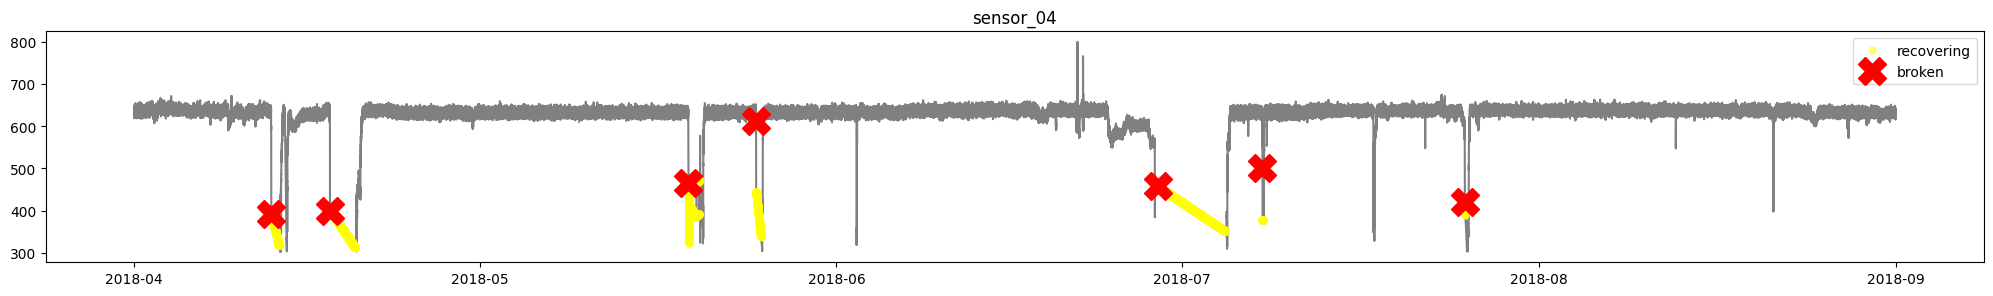

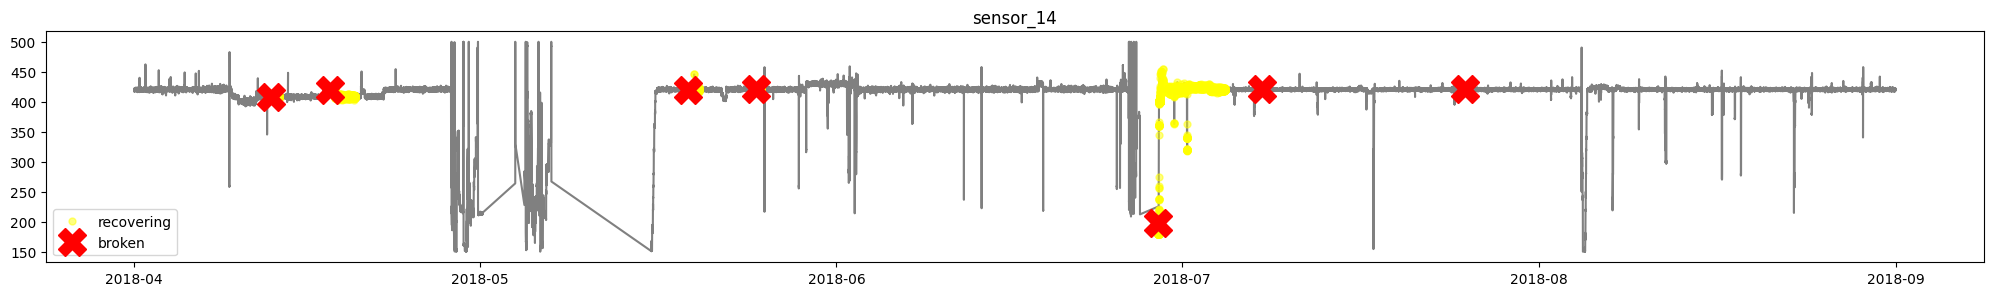

In [158]:
# plot two representative sensors
plot_sensor_anomolies(corrected_df, ['sensor_04'])
plot_sensor_anomolies(corrected_df, ['sensor_14'])

As observed, applying linear interpolation to the removed noises and anomaly points results in their reconstruction, which does not lead to any improvement and can potentially worsen the situation.

In [175]:
# use linear interpolation
interpolate_df = outlier_removal(corrected_df, name='z-score', threshold=2, 
                               interpolate=True, outlier=False, standardization=True)

In [177]:
interpolate_df = anomaly_detection_methods(interpolate_df, ["Isolation Forest"])

Isolation Forest
IsolationForest(contamination=0.06574074074074077, n_jobs=-1)


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
Isolation Forest
 1    205836
-1     14484
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [178]:
anomaly_counter(interpolate_df)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   6   1

the predictions for NORMAL:
Isolation Forest       1     -1
Isolation Forest  195485  10351

the predictions for RECOVERING:
Isolation Forest      1    -1
Isolation Forest  10345  4132



Another approach that can be utilized is using the fillna method to replace all NaN values with the mean value. While this approach helps neutralize the effect of noisy data points, it may also diminish the impact of anomaly data points. Moving forward, we will proceed with implementing this method.

In [217]:
# use fillna mean
fillna_df = outlier_removal(corrected_df, name='z-score', threshold=2, 
                               interpolate=False, outlier=False, standardization=True)

In [218]:
fillna_df = anomaly_detection_methods(fillna_df, ["Isolation Forest"])

Isolation Forest
IsolationForest(contamination=0.06574074074074077, n_jobs=-1)


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
Isolation Forest
 1    205836
-1     14484
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [219]:
anomaly_counter(fillna_df)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   6   1

the predictions for NORMAL:
Isolation Forest       1     -1
Isolation Forest  194745  11091

the predictions for RECOVERING:
Isolation Forest      1    -1
Isolation Forest  11085  3392



The results obtained from applying the mean value as a replacement for NaN values have further deteriorated the outcome. As anticipated, this method proves to be inadequate as a data preprocessing technique for this particular dataset. It removes a significant amount of valuable anomaly data while attempting to remove noise. Consequently, in the next step, I will explore resampling and aggregation methods to assess their suitability for this specific dataset.

## 3- Resampling and Aggregation

Here I could find that by increasing the resampling we loose some information but the accuracy increases


In [449]:
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor

In [461]:
m, n = df.shape
Y = df.iloc[:,:n-1] # ignore machine status columns
Y = Y.fillna(method='bfill')
Y.shape

(220320, 49)

In [462]:
import pandas as pd

# Assuming your time series data is stored in a DataFrame named 'df' with a DateTimeIndex

# Specify the desired resampling frequency (e.g., 'D' for daily, 'H' for hourly, etc.)
resample_frequency = '30T'

# Perform resampling
df_resampled = Y.resample(resample_frequency).mean()  # You can use other aggregation functions like sum, median, etc. instead of mean

# Optionally, you can interpolate missing values after resampling
df_resampled = df_resampled.interpolate(method='linear')

In [463]:
df_resampled = df_resampled.apply(lambda x: (x - x.mean()) / x.std())

In [464]:
df.machine_status = pd.factorize(df.machine_status)[0]

In [ ]:
#increasing the number of data points
resampled_labels = df.machine_status.repeat(2)
resampled_labels= resampled_labels.reset_index()
a = pd.DataFrame(resampled_labels.machine_status)
b = a[:len(a)-1].set_index(df_resampled.index)
df_resampled['machine_status'] = b


In [465]:


# Get the label of each hourly interval based on the majority label of the original data points
resampled_labels = df['machine_status'].resample('30T').apply(lambda x: np.bincount(x).argmax())

#resampled_labels = resampled_labels.fillna(method='Ffill')
# Create a new DataFrame with the resampled data and assigned labels

df_resampled['machine_status'] = resampled_labels

# Print the resampled data with labels
#df_resampled


In [467]:
broken_rows = df_resampled[df_resampled['machine_status']==1]
recovery_rows = df_resampled[df_resampled['machine_status']==2]
normal_rows = df_resampled[df_resampled['machine_status']==0]

In [468]:
outliers_fraction = 1 - (len(normal_rows)/(len(df_resampled))) 
outliers_fraction

0.06576797385620914

In [469]:


y_pred = IsolationForest(contamination=outliers_fraction, n_jobs = -1).fit(df_resampled.iloc[:,:n-1]).predict(df_resampled.iloc[:,:n-1])
    
df_resampled['Isolation Forest'] = y_pred
print('-'*100)
print(f'number of anomolies detected')
print( np.unique(y_pred, return_counts=True))
print('-'*100)

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
(array([-1,  1]), array([ 483, 6861], dtype=int64))
----------------------------------------------------------------------------------------------------


In [470]:
anomaly_counter(df_resampled)

the predictions for 0:
Isolation Forest     1   -1
Isolation Forest  6601  260

the predictions for 2:
Isolation Forest    1   -1
Isolation Forest  260  223



In [471]:
df_resampled[df_resampled['machine_status']==1]

Empty DataFrame
Columns: [sensor_00, sensor_01, sensor_02, sensor_03, sensor_04, sensor_05, sensor_06, sensor_07, sensor_08, sensor_09, sensor_10, sensor_11, sensor_12, sensor_13, sensor_14, sensor_16, sensor_17, sensor_18, sensor_19, sensor_20, sensor_21, sensor_22, sensor_23, sensor_24, sensor_25, sensor_26, sensor_27, sensor_28, sensor_29, sensor_30, sensor_31, sensor_32, sensor_33, sensor_34, sensor_35, sensor_36, sensor_37, sensor_38, sensor_39, sensor_40, sensor_41, sensor_42, sensor_43, sensor_44, sensor_45, sensor_46, sensor_47, sensor_48, sensor_49, machine_status, Isolation Forest]
Index: []

[0 rows x 51 columns]

In [472]:
def plot_sensor_anomolies(sensor, name):
    anomoly_rows = df_resampled[df_resampled[f'{name}'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df_resampled[sensor], color='grey')
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='red', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=7, label='anomoly predicted', alpha = 0.5)
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

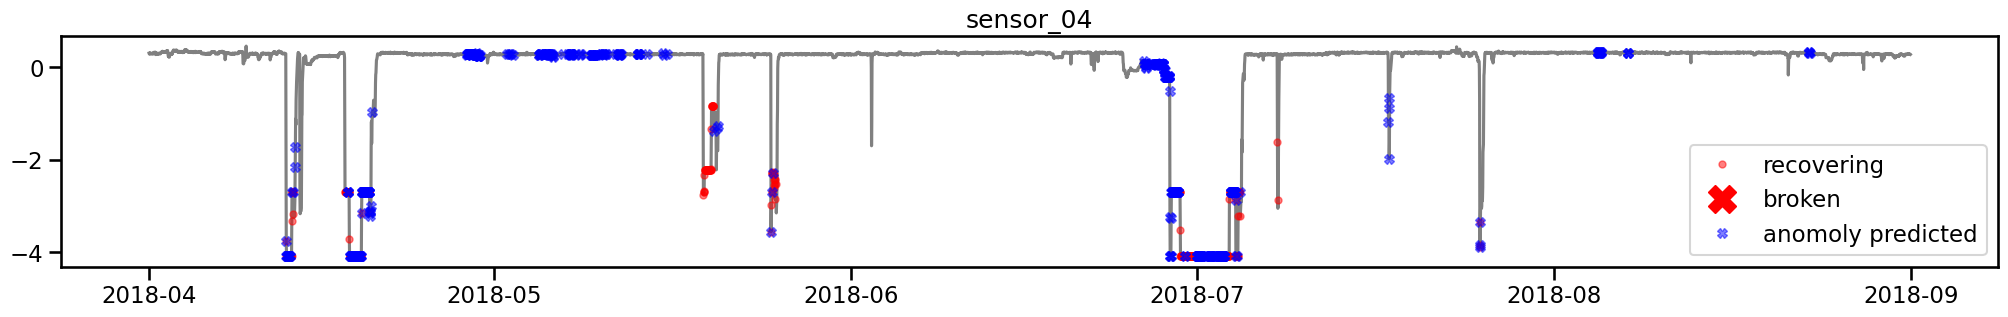

In [474]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

In [148]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outliers_fraction = 1 - (len(normal_rows)/(len(df))) 

anomaly_algorithms = [
    ("Isolation Forest",IsolationForest(contamination=outliers_fraction, n_jobs = -1)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction)),
    ("Local Outlier Factor",LocalOutlierFactor(contamination=outliers_fraction, n_jobs = -1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction))]

-----------------------


Smoothing data

In [240]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
import numpy as np

In [241]:
m, n = df.shape
Y = df.iloc[:,:n-1] # ignore machine status columns
Y = Y.interpolate(method='linear')
Y.shape

(220320, 49)

In [242]:
#df_norm = Y.apply(lambda x: (x - x.mean()) / x.std())

In [243]:
def data_smoother(df):

    #calculate rolling mean
    rollingMean = df.rolling(window=200, min_periods=1).mean()
    #avg = df.loc[1].loc[:10].mean()
    #rollingMean.fillna(avg, inplace=True)

    #calculate exponential smoothing technique
    #smoothed_dfs = {}

    #for column in df.columns:
    #    model = SimpleExpSmoothing(df[column])
    #    smoothed_model = model.fit()
    #   smoothed_dfs[column] = smoothed_model.fittedvalues

    #smoothed_df = pd.DataFrame(smoothed_dfs)

    #calculate halt smoothing technique
    #holtSmoothing =Holt(df).fit()

    return  rollingMean#rollingMean#, rollingMean, holtSmoothing
    
smooth = data_smoother(Y)

In [244]:
smooth

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 00:00:00   2.465394  47.092010  53.211800  46.310760  634.375000   
2018-04-01 00:01:00   2.465394  47.092010  53.211800  46.310760  634.375000   
2018-04-01 00:02:00   2.458507  47.178817  53.211800  46.339697  635.879633   
2018-04-01 00:03:00   2.458999  47.157115  53.200950  46.354164  633.940975   
2018-04-01 00:04:00   2.456343  47.152774  53.203120  46.362845  634.444440   
...                        ...        ...        ...        ...         ...   
2018-08-31 23:55:00   2.402657  48.024087  50.610460  43.171657  632.023810   
2018-08-31 23:56:00   2.402696  48.019096  50.609158  43.169486  632.001240   
2018-08-31 23:57:00   2.402642  48.014105  50.607639  43.167316  631.963624   
2018-08-31 23:58:00   2.402677  48.009113  50.606337  43.165146  632.016865   
2018-08-31 23:59:00   2.402637  48.004122  50.605252  43.162976  632.053323   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00  76.459750  13.411460  16.131360  15.567130  15.053530   
2018-04-01 00:01:00  76.459750  13.411460  16.131360  15.567130  15.053530   
2018-04-01 00:02:00  75.488493  13.382523  16.100017  15.584010  15.039063   
2018-04-01 00:03:00  75.863615  13.366248  16.136790  15.612343  15.049915   
2018-04-01 00:04:00  76.008686  13.363716  16.151620  15.629342  15.056426   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  69.237443  15.112087  16.658892  15.676324  15.092919   
2018-08-31 23:56:00  69.267900  15.112087  16.658892  15.676324  15.093100   
2018-08-31 23:57:00  69.310453  15.111943  16.659362  15.676143  15.093280   
2018-08-31 23:58:00  69.346781  15.112087  16.658928  15.676577  15.093606   
2018-08-31 23:59:00  69.375551  15.111907  16.658928  15.676324  15.093244   

                     ...  sensor_40  sensor_41  sensor_42  sensor_43  \
timestamp            ...                                               
2018-04-01 00:00:00  ...  70.572910  30.989580  31.770832  41.927080   
2018-04-01 00:01:00  ...  70.572910  30.989580  31.770832  41.927080   
2018-04-01 00:02:00  ...  70.225690  30.815970  31.770831  41.840273   
2018-04-01 00:03:00  ...  70.703120  30.729165  31.705729  41.601557   
2018-04-01 00:04:00  ...  71.927078  30.781248  31.666667  41.562496   
...                  ...        ...        ...        ...        ...   
2018-08-31 23:55:00  ...  77.736974  29.433593  30.061197  42.240882   
2018-08-31 23:56:00  ...  77.710933  29.433593  30.065104  42.231767   
2018-08-31 23:57:00  ...  77.696610  29.430989  30.070312  42.220049   
2018-08-31 23:58:00  ...  77.697912  29.425781  30.075520  42.213538   
2018-08-31 23:59:00  ...  77.716141  29.423177  30.078125  42.212236   

                     sensor_44  sensor_45  sensor_46  sensor_47   sensor_48  \
timestamp                                                                     
2018-04-01 00:00:00  39.641200  65.682870  50.925930  38.194440  157.986100   
2018-04-01 00:01:00  39.641200  65.682870  50.925930  38.194440  157.986100   
2018-04-01 00:02:00  39.544751  65.586420  51.022380  38.194441  157.310933   
2018-04-01 00:03:00  39.424188  65.393518  51.070605  38.194441  156.973350   
2018-04-01 00:04:00  39.293980  65.335646  51.215280  38.310183  157.233780   
...                        ...        ...        ...        ...         ...   
2018-08-31 23:55:00  60.429687  59.045138  59.215856  44.008968  298.166955   
2018-08-31 23:56:00  60.561342  59.014756  59.195602  44.008968  297.534721   
2018-08-31 23:57:00  60.684317  58.978587  59.168113  44.008968  296.805554   
2018-08-31 23:58:00  60.795717  58.940972  59.139178  44.006075  296.008390   
2018-08-31 23:59:00  60.894097  58.896122  59.110243  43.998841  295.182290   

             

In [245]:
df_norm = smooth.apply(lambda x: (x - x.mean()) / x.std())

In [246]:
df_norm['machine_status'] = df.machine_status

In [247]:
df_norm = df_norm.dropna(axis=0)

In [248]:
df_norm

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   0.319767  -0.155481   0.640538   1.071474   0.307577   
2018-04-01 00:01:00   0.319767  -0.155481   0.640538   1.071474   0.307577   
2018-04-01 00:02:00   0.308220  -0.128773   0.640538   1.083600   0.318165   
2018-04-01 00:03:00   0.309045  -0.135450   0.637572   1.089662   0.304523   
2018-04-01 00:04:00   0.304591  -0.136786   0.638166   1.093300   0.308066   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   0.214580   0.131290  -0.070462  -0.243917   0.291032   
2018-08-31 23:56:00   0.214646   0.129755  -0.070817  -0.244826   0.290874   
2018-08-31 23:57:00   0.214555   0.128219  -0.071233  -0.245736   0.290609   
2018-08-31 23:58:00   0.214613   0.126683  -0.071589  -0.246645   0.290984   
2018-08-31 23:59:00   0.214547   0.125148  -0.071885  -0.247554   0.291240   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   0.187763   0.071783   0.211351   0.244552   0.197890   
2018-04-01 00:01:00   0.187763   0.071783   0.211351   0.244552   0.197890   
2018-04-01 00:02:00   0.128212   0.061546   0.201250   0.250401   0.192794   
2018-04-01 00:03:00   0.151212   0.055788   0.213101   0.260219   0.196616   
2018-04-01 00:04:00   0.160107   0.054892   0.217880   0.266110   0.198910   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  -0.255059   0.673440   0.381357   0.282390   0.211766   
2018-08-31 23:56:00  -0.253192   0.673440   0.381357   0.282390   0.211830   
2018-08-31 23:57:00  -0.250583   0.673389   0.381509   0.282327   0.211894   
2018-08-31 23:58:00  -0.248355   0.673440   0.381369   0.282478   0.212009   
2018-08-31 23:59:00  -0.246591   0.673376   0.381369   0.282390   0.211881   

                     ...  sensor_41  sensor_42  sensor_43  sensor_44  \
timestamp            ...                                               
2018-04-01 00:00:00  ...  -0.719940  -0.485213  -0.260879  -0.389342   
2018-04-01 00:01:00  ...  -0.719940  -0.485213  -0.260879  -0.389342   
2018-04-01 00:02:00  ...  -0.748500  -0.485213  -0.272484  -0.401836   
2018-04-01 00:03:00  ...  -0.762780  -0.493789  -0.304397  -0.417454   
2018-04-01 00:04:00  ...  -0.754212  -0.498935  -0.309619  -0.434321   
...                  ...        ...        ...        ...        ...   
2018-08-31 23:55:00  ...  -0.975912  -0.710428  -0.218927   2.303579   
2018-08-31 23:56:00  ...  -0.975912  -0.709913  -0.220146   2.320633   
2018-08-31 23:57:00  ...  -0.976340  -0.709227  -0.221713   2.336563   
2018-08-31 23:58:00  ...  -0.977197  -0.708541  -0.222583   2.350994   
2018-08-31 23:59:00  ...  -0.977625  -0.708198  -0.222757   2.363738   

                     sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
timestamp                                                                    
2018-04-01 00:00:00   2.593880   0.295359  -0.925662   0.094703   0.677697   
2018-04-01 00:01:00   2.593880   0.295359  -0.925662   0.094703   0.677697   
2018-04-01 00:02:00   2.582803   0.305151  -0.925662   0.085741   0.665374   
2018-04-01 00:03:00   2.560649   0.310047  -0.925662   0.081260   0.654592   
2018-04-01 00:04:00   2.554003   0.324735  -0.908228   0.084717   0.644425   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   1.831584   1.136989  -0.049828   1.955423   3.674014   
2018-08-31 23:56:00   1.828094   1.134932  -0.049828   1.947030   3.685012   
2018-08-31 23:57:00   1.823941   1.132142  -0.049828   1.937352   3.695733   
2018-08-31 23:58:00   1.819621   1.129204  -0.050264   1.926770   3.705714   
2018-08-31 23:59:00   1.814470   1.126266  -0.051354   1.915805   3.715049   

                     machine_status  
t

In [249]:
df_norm.machine_status.value_counts()

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

In [250]:
broken_rows = df_norm[df_norm['machine_status']=='BROKEN']
recovery_rows = df_norm[df_norm['machine_status']=='RECOVERING']
normal_rows = df_norm[df_norm['machine_status']=='NORMAL']

In [251]:
outliers_fraction = 1 - (len(normal_rows)/(len(df_norm))) 
outliers_fraction

0.06574074074074077

In [252]:
y_pred = IsolationForest(contamination=outliers_fraction, n_jobs = -1).fit(df_norm.iloc[:,:n-1]).predict(df_norm.iloc[:,:n-1])
    
df_norm['Isolation Forest'] = y_pred
print('-'*100)
print(f'number of anomolies detected')
print( np.unique(y_pred, return_counts=True))
print('-'*100)

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
(array([-1,  1]), array([ 14484, 205836], dtype=int64))
----------------------------------------------------------------------------------------------------


In [253]:
# IF rolling mean 60
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   6   1

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  197149  8687

the predictions for RECOVERING:
Isolation Forest     1    -1
Isolation Forest  8681  5796



In [167]:
# IF rolling mean 30
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   6   1

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  197486  8350

the predictions for RECOVERING:
Isolation Forest     1    -1
Isolation Forest  8344  6133



In [147]:
# IF exponential computer optimization
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   5   2

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  198938  6898

the predictions for RECOVERING:
Isolation Forest    -1     1
Isolation Forest  7584  6893



In [31]:
# svm exponential 0.5
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest  -1   1
Isolation Forest   4   3

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  196230  9606

the predictions for RECOVERING:
Isolation Forest     1    -1
Isolation Forest  9602  4875



In [132]:
# IF exponential 1.5
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   5   2

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  198611  7225

the predictions for RECOVERING:
Isolation Forest    -1     1
Isolation Forest  7257  7220



In [118]:
# IF exponential 1
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   5   2

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  200716  5120

the predictions for RECOVERING:
Isolation Forest    -1     1
Isolation Forest  9362  5115



In [30]:
# IF exponential 0.8
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   6   1

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  198902  6934

the predictions for RECOVERING:
Isolation Forest    -1     1
Isolation Forest  7549  6928



In [31]:
#IF exponential 0.5
anomaly_counter(df_norm)

the predictions for BROKEN:
Isolation Forest   1  -1
Isolation Forest   6   1

the predictions for NORMAL:
Isolation Forest       1    -1
Isolation Forest  197141  8695

the predictions for RECOVERING:
Isolation Forest     1    -1
Isolation Forest  8689  5788



In [ ]:
# time series plots for sensor data
df_norm.plot(subplots =True, sharex = True, figsize = (20,50))

In [50]:
def plot_sensor_anomolies(sensor, name):
    anomoly_rows = df_norm[df_norm[f'{name}'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df_norm[sensor], color='grey')
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=7, label='anomoly predicted', alpha = 0.2)
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

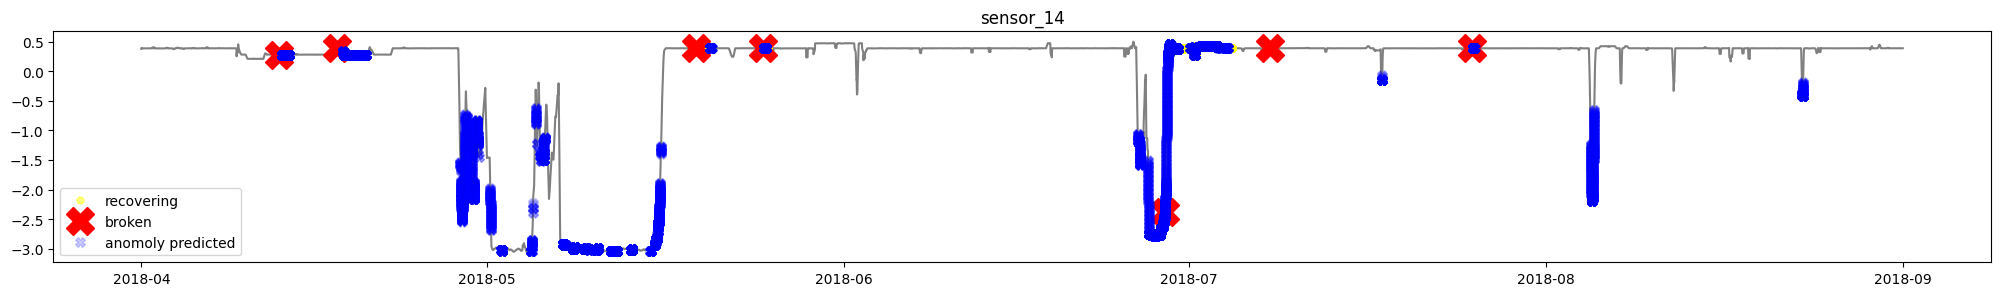

In [256]:
plot_sensor_anomolies('sensor_14', 'Isolation Forest')

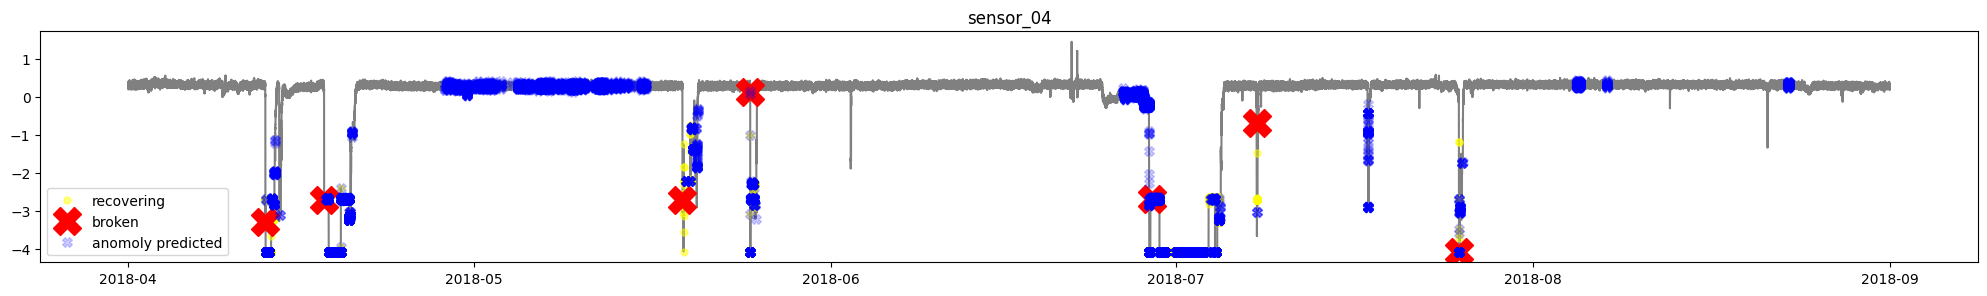

In [77]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

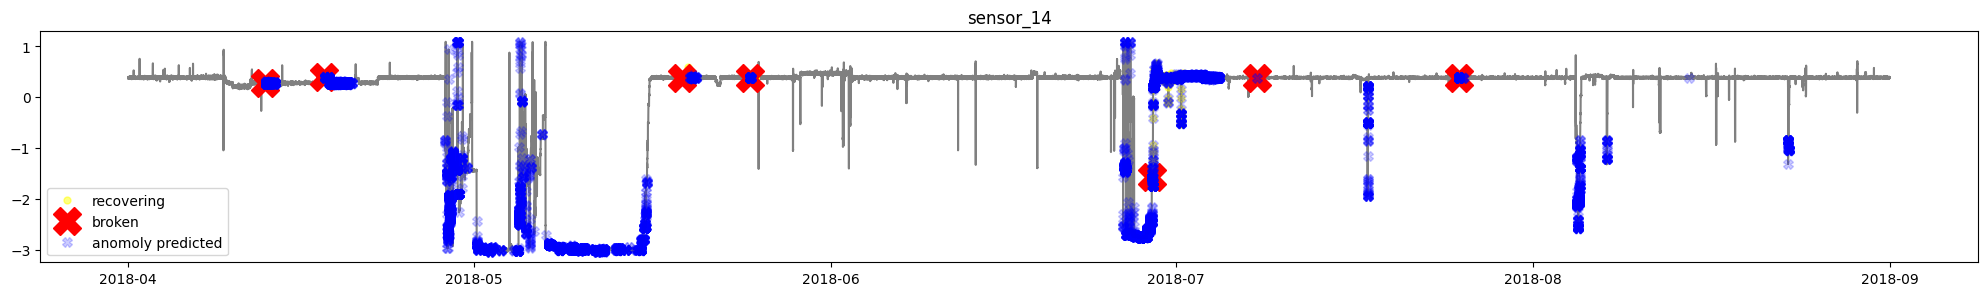

In [33]:
plot_sensor_anomolies('sensor_14', 'Isolation Forest')

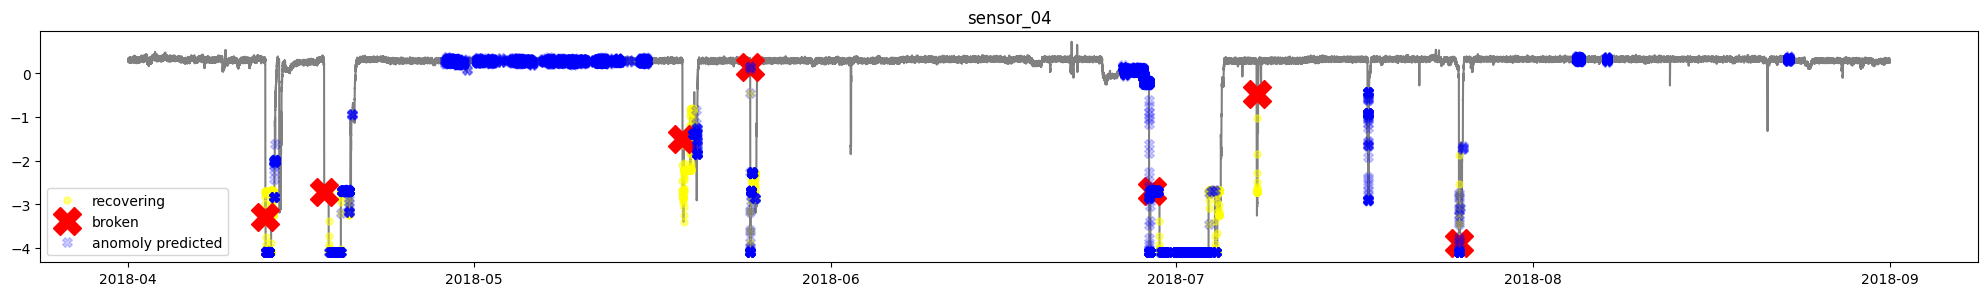

In [45]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

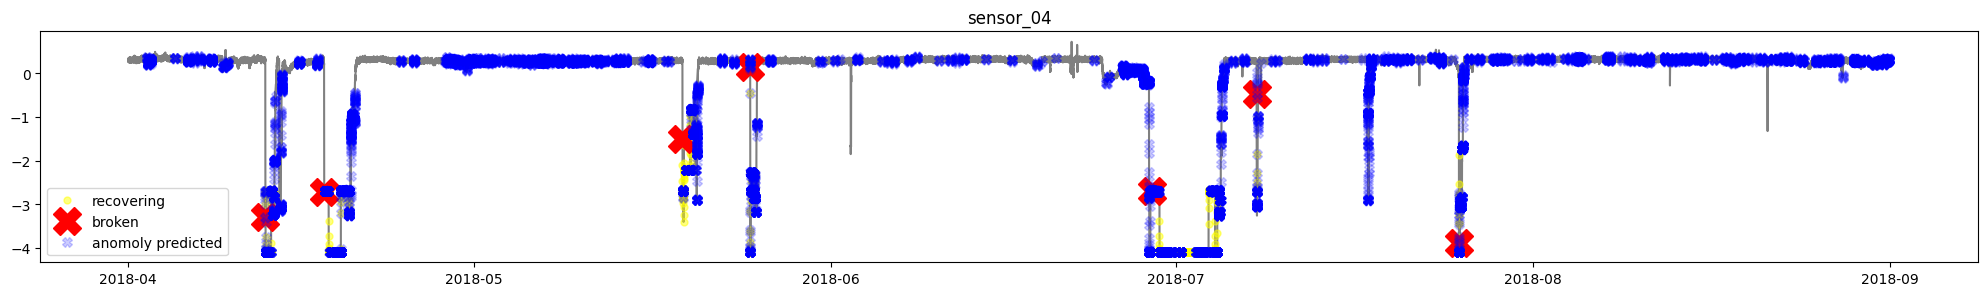

In [34]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

In [ ]:
df_norm.plot(subplots =True, sharex = True, figsize = (20,50))